Renan, sou Anilton e vou avaliar seu projeto. 

<div class="alert alert-block alert-danger">
    
<b>Comentário do Tutor</b> <a class="tocSkip"></a>
    
Renan, neste momento você precisa fazer uma decomposição. Está faltando isso aqui, não posso aprovar enquanto não o fizer. 
- <b> Fiz uma decomposicao de tarefas descrevendo os passos que serao tomados nessa analise. Online eu achei PCA e SVD quando pesquisei sobre decomposicao, mas nao tenho certeza se eh isso que vc quer.</b>
</div>

Já vou dar feedback das outras partes neste momento para você já ir trabalhando também, mas lembre-se, você só precisa entregar a decomposição agora. 

Está como amarelo, pois você não precisa corrigir agora, só quando for entregar a parte final. 
<div class="alert alert-block alert-warning">
<b>Comentário do Tutor</b> <a class="tocSkip"></a>
    
- está faltando avaliar os pedidos cancelados (letra C no stockcode) e com quantidade negativa.
- <b> realmente nao tinha me atentado para isso, no caso aqui, transformei os valores de quantidade negativa em positiva, e separei os dados com valores cancelados em um data frame diferente para analise.</b>
- quando vc faz o fillna no customer_id e depois agrupa para fazer a análise RFM, você cria um outlier e isso pode atrapalhar a segmentação.
- <b> faz sentido, vou refazer sem, e analisar a diferenca nos resultados.</b>
- está faltando a apresentação e o dashboard.
- <b> ja vou trabalhar nisso e na conclusao enquanto vc revisa o projeto novamente.</b>
</div>


**No geral as análises ficaram bem bacanas. Falta pouquinho para você fechar o projeto! Parabéns!**

- voce poderia comentar no fim do projeto algum outro caminho que vc tomaria, alguma dica em relacao a clareza do projeto, alguma dica para subir para um nivel mais profissional, ou eh isso mesmo ? coisas do tipo. Sinto que estou mais fluido desde que comecei esse projeto, mas nao sei avaliar minha performance ainda.


# Data description

The dataset contains the transaction history of Everything Plus, an online store that sells household items.

The file ecommerce_dataset_us.csv contains the following columns:

<b>InvoiceNo</b> — order identifier

<b>StockCode</b> — item identifier

<b>Description</b> — item name

<b>Quantity</b>

<b>InvoiceDate</b> — order date

<b>UnitPrice</b> — price per item

<b>CustomerID</b>

# Decomposition

 As per project description we have a data set containing information about customers that use an online e-commerce platform to buy products.
 I will decompose the steps I will take in this project.
 
 1. <b>Project objectives</b>: Defining what we would like to achieve at the end of this project.
 2. <b>KPI'S</b>: Define what metric will be used throughout this project.
 3. <b>Standardize data</b>: Review column names and data types to achieve good manipulation of data.
 4. <b>Missing values</b>: I will treat missing values in accord with the size of them compared with total data set, they can be deleted or filled in order to obtain a solid data set.
 5. <b>Duplicated values</b>: I will treat them depending on quantity of duplicates in relation with total data. We can delete them if the percentage of total is not too high.
 6. <b>Enhance data</b>: In this process will add columns that will be relevant for our analysis, date columns and total order value columns are some of them that will be added.
 7. <b>Data discrepancies</b>: They will be treated as found. Any data that could cause disturbance on our analysis, will have to be modified or deleted.
 8. <b>Customer segmentation</b>: Use of available data from our main dateset like revenue and dates to identify and categorize customers by recency, frequency and monetary habits.
 9. <b>General analysis</b>: A general analysis using our main dateset to identify KPI's performance, comparison of season revenue, canceled orders and any other insight that this part of analysis will give.
 10. <b>Segmentation analysis</b>: Analysis on KPI's per customer segmentation, this will highlight habits of customers and visualize what strategy  take to to increase revenue using data available.
 11. <b>Conclusion</b>: General conclusion of the analysis. Suggestions of actions to increase revenue.
 12. <b>Dashboard</b>: Creation of dashboard to monitor company KPI's.
 13. <b>Presentation</b>: PPT and PDF presentation with all insights found and conclusion.

# Objectives

* Understand what kind of customer we have and the quantity for each segment.
* Identify sales seasonality per segment.
* Identify popular products per segment.
* Identify orders volume per segment.
* Identify patterns in sales.
* Identify high volume and high revenue products.
* Understand our total sales through time period.
* From customer segmentation define what approach should be taken for each segment to increase revenue.

# KPI's

* Order Value - Revenue
* Quantity - Volume
* Date - Frequency, recency
* Total Sales

# Initializing

## libraries

In [725]:
#loading libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.color_palette("Paired")
sns.set_context('talk')


## functions

In [727]:
#function to define 'recency_score' (x=value, p=recency, monetary, frequency, d=quartiles)
def Rscore (x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [728]:
#function to define frequency and monetary score (x=value, p=recency, monetary, frequency, d=quartiles)
def FMscore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [729]:
#function to calculate percentage
def percentage_calculation(value, total):
    if total == 0:
        return 0 
    else:
        return(value/total) * 100
        

In [730]:
#function to categorize the unit price
def price_category(unit_price):
    if unit_price <= 50:
        return 'cheap'    
    if unit_price <= 200:
        return 'low-cost'
    if unit_price <= 500:
        return 'affordable'
    if unit_price <= 1000:
        return 'high-cost'
    if unit_price <= 5000:
        return 'expensive'
    if unit_price >= 5001:
        return 'very expensive'

In [731]:
#function to get top products by mean value
def top_mean(customer_df, group_col, value_col, top_n=10):
    top_products = customer_df.groupby(group_col)[value_col].mean().round(2).reset_index().sort_values(by=value_col, ascending=False).head(top_n)
    return top_products
    

In [732]:
#function to get top products by sum value
def top_sum(customer_df, group_col, value_col, top_n=10):
    top_products = customer_df.groupby(group_col)[value_col].sum().round(2).reset_index().sort_values(by=value_col, ascending=False).head(top_n)
    return top_products
    

## loading files

In [734]:
#loading files

try:
    ecom = pd.read_csv("/datasets/ecommerce_dataset_us.csv", delimiter="\t", engine='python')

except FileNotFoundError:
    ecom = pd.read_csv("ecommerce_dataset_us.csv", delimiter="\t", engine='python')

In [735]:
ecom.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

In [736]:
ecom.shape

(541909, 7)

In [737]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [738]:
ecom.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

    min values in quantity and unit price can't be negative

# Pre processing

## standarizing

In [742]:
#lowering case columns
ecom.columns = ecom.columns.str.lower()

In [743]:
#renaming columns
ecom = ecom.rename(columns={'invoiceno':'invoice_no','stockcode' : 'stock_code', 'invoicedate' : 'invoice_date', 'unitprice' : 'unit_price', 'customerid' : 'customer_id'})

In [744]:
#changing data type to datetime
ecom['invoice_date'] = pd.to_datetime(ecom['invoice_date'])

In [745]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  
0 2018-11-29 08:26:00        2.55      17850.0  
1 2018-11-29 08:26:00        3.39      17850.0  
2 2018-11-29 08:26:00        2.75      17850.0  
3 2018-11-29 08:26:00        3.39      17850.0  
4 2018-11-29 08:26:00        3.39      17850.0

In [746]:
#transforming negative values in positive
ecom['unit_price'] = ecom['unit_price'].abs()

In [747]:
#transforming negative quantities in positive
ecom['quantity'] = ecom['quantity'].abs()

## missing values

In [749]:
#percentage of missing values
ecom.isna().mean() * 100 

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
dtype: float64

    missing values from customer_id are 24.9% of total data.
    I will not fill those values as it could cause outliers and affect segmentation.
    
    missing values from description are only 0.26% of total data.
    this data will be deleted.
    

In [751]:
#dropping 'description' missing values 
ecom.dropna(subset=['description'], inplace=True)

In [752]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    540455 non-null  object        
 1   stock_code    540455 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      540455 non-null  int64         
 4   invoice_date  540455 non-null  datetime64[ns]
 5   unit_price    540455 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.0+ MB


## duplicates

In [754]:
#counting duplicated values on data
duplicated = ecom.duplicated().value_counts()
duplicated

False    535187
True       5268
Name: count, dtype: int64

In [755]:
#calculating percentage of duplicated
false_count = duplicated[False]
true_count = duplicated[True]
percentage_true = (true_count / np.sum(duplicated)) * 100
percentage_true

0.9747342516953308

    less than 1% of values are duplicated, will delete those

In [757]:
#dropping duplicates
ecom = ecom.drop_duplicates()

In [758]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    535187 non-null  object        
 1   stock_code    535187 non-null  object        
 2   description   535187 non-null  object        
 3   quantity      535187 non-null  int64         
 4   invoice_date  535187 non-null  datetime64[ns]
 5   unit_price    535187 non-null  float64       
 6   customer_id   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.7+ MB


## enhancing data

In [760]:
#adding order_value column
ecom.loc[:, 'order_value'] = ecom['quantity'] * ecom['unit_price']

In [761]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value  
0 2018-11-29 08:26:00        2.55      17850.0        15.30  
1 2018-11-29 08:26:00        3.39      17850.0        20.34  
2 2018-11-29 08:26:00        2.75      17850.0        22.00  
3 2018-11-29 08:26:00        3.39      17850.0        20.34  
4 2018-11-29 08:26:00        3.39      17850.0        20.34

In [762]:
#sales 'month_year' column
ecom.loc[:,'month_year'] = ecom['invoice_date'].dt.strftime('%Y-%m')

In [763]:
#adding 'date' only column
ecom.loc[:,'date'] = ecom['invoice_date'].dt.date

In [764]:
#adding 'year' column
ecom.loc[:,'year'] = ecom['invoice_date'].dt.year

In [765]:
#adding 'day' column
ecom.loc[:,'day'] = ecom['invoice_date'].dt.weekday

In [766]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day  
0  2018-11-29  2018    3  
1  2018-11-29  2018    3  
2  2018-11-29  2018    3  
3  2018-11-29  2018    3  
4  2018-11-29  2018    3

    new date columns created to use on sales x time insights

In [768]:
#min 'unit_price'
ecom['unit_price'].min()

0.0

In [769]:
#max 'unit_price'
ecom['unit_price'].max()

38970.0

In [770]:
#categorizing by unit price
ecom['price_category'] = ecom['unit_price'].apply(price_category)
ecom['price_category'].unique()


array(['cheap', 'low-cost', 'high-cost', 'affordable', 'very expensive',
       'expensive'], dtype=object)

In [771]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

## canceled orders

In [773]:
#canceled orders
canceled_orders = ecom[ecom['stock_code'].str.contains('C', case=False)]
canceled_orders

invoice_no stock_code                        description  quantity  \
87         536378     85099C     JUMBO  BAG BAROQUE BLACK WHITE        10   
91         536378     84997C  BLUE 3 PIECE POLKADOT CUTLERY SET         6   
121        536381     37444C     PINK BREAKFAST CUP AND SAUCER          1   
154       C536383     35004C    SET OF 3 COLOURED  FLYING DUCKS         1   
176        536386     85099C     JUMBO  BAG BAROQUE BLACK WHITE       100   
...           ...        ...                                ...       ...   
541321     581497     84997c    CHILDRENS CUTLERY POLKADOT BLUE         3   
541537     581498     85099C     JUMBO  BAG BAROQUE BLACK WHITE         4   
541649     581538     85071C  CHARLIE+LOLA"EXTREMELY BUSY" SIGN         1   
541778     581578     84997C    CHILDRENS CUTLERY POLKADOT BLUE         8   
541809     581579     85099C     JUMBO  BAG BAROQUE BLACK WHITE        10   

              invoice_date  unit_price  customer_id  order_value month_year  \
87     2018-11-29 09:37:00        1.95      14688.0        19.50    2018-11   
91     2018-11-29 09:37:00        3.75      14688.0        22.50    2018-11   
121    2018-11-29 09:41:00        2.95      15311.0         2.95    2018-11   
154    2018-11-29 09:49:00        4.65      15311.0         4.65    2018-11   
176    2018-11-29 09:57:00        1.65      16029.0       165.00    2018-11   
...                    ...         ...          ...          ...        ...   
541321 2019-12-07 10:23:00        8.29          NaN        24.87    2019-12   
541537 2019-12-07 10:26:00        4.13          NaN        16.52    2019-12   
541649 2019-12-07 11:34:00        0.39      14446.0         0.39    2019-12   
541778 2019-12-07 12:16:00        4.15      12713.0        33.20    2019-12   
541809 2019-12-07 12:19:00        1.79      17581.0        17.90    2019-12   

              date  year  day price_category  
87      2018-11-29  2018    3          cheap  
91      2018-11-29  2018    3          cheap  
121     2018-11-29  2018    3          cheap  
154     2018-11-29  2018    3          cheap  
176     2018-11-29  2018    3          cheap  
...            ...   ...  ...            ...  
541321  2019-12-07  2019    5          cheap  
541537  2019-12-07  2019    5          cheap  
541649  2019-12-07  2019    5          cheap  
541778  2019-12-07  2019    5          cheap  
541809  2019-12-07  2019    5          cheap  

[6834 rows x 13 columns]

## data discrepancies

In [775]:
#removing canceled orders from main dataframe
ecom = ecom[~ecom['stock_code'].str.contains('C', case=False)]

In [776]:
#adjusted bad debt row
rows_with_adjust_bad_debt = ecom[ecom['description'].str.contains('adjust bad debt', case=False)]
rows_with_adjust_bad_debt

invoice_no stock_code      description  quantity        invoice_date  \
299982    A563185          B  Adjust bad debt         1 2019-08-10 14:50:00   
299983    A563186          B  Adjust bad debt         1 2019-08-10 14:51:00   
299984    A563187          B  Adjust bad debt         1 2019-08-10 14:52:00   

        unit_price  customer_id  order_value month_year        date  year  \
299982    11062.06          NaN     11062.06    2019-08  2019-08-10  2019   
299983    11062.06          NaN     11062.06    2019-08  2019-08-10  2019   
299984    11062.06          NaN     11062.06    2019-08  2019-08-10  2019   

        day  price_category  
299982    5  very expensive  
299983    5  very expensive  
299984    5  very expensive

In [777]:
#dropping row that contains 'adjust bad debt'
ecom = ecom[~ecom['description'].str.contains('Adjust bad debt', case=False)]

In [778]:
#AMAZON FEE rows
rows_with_amazon_fee = ecom[ecom['description'].str.contains('AMAZON FEE', case=False)]
rows_with_amazon_fee.head()

invoice_no stock_code description  quantity        invoice_date  \
14514    C537600  AMAZONFEE  AMAZON FEE         1 2018-12-05 12:41:00   
15016    C537630  AMAZONFEE  AMAZON FEE         1 2018-12-05 15:04:00   
15017     537632  AMAZONFEE  AMAZON FEE         1 2018-12-05 15:08:00   
16232    C537644  AMAZONFEE  AMAZON FEE         1 2018-12-05 15:34:00   
16313    C537647  AMAZONFEE  AMAZON FEE         1 2018-12-05 15:41:00   

       unit_price  customer_id  order_value month_year        date  year  day  \
14514        1.00          NaN         1.00    2018-12  2018-12-05  2018    2   
15016    13541.33          NaN     13541.33    2018-12  2018-12-05  2018    2   
15017    13541.33          NaN     13541.33    2018-12  2018-12-05  2018    2   
16232    13474.79          NaN     13474.79    2018-12  2018-12-05  2018    2   
16313     5519.25          NaN      5519.25    2018-12  2018-12-05  2018    2   

       price_category  
14514           cheap  
15016  very expensive  
15017  very expensive  
16232  very expensive  
16313  very expensive

In [779]:
#total order value to be dropped
rows_with_amazon_fee['order_value'].sum()

249042.68

    further analysis revealed that 'Adjust bad debt' and 'AMAZON FEE' descriptions were found, and I decided to delete them from the dataset as they could cause discrepancies in the data.
    this will be highlighted on presentation as those values are quite high.

In [781]:
#Manual rows
rows_with_manual = ecom[ecom['description'].str.contains('Manual', case=False)]
rows_with_manual

invoice_no stock_code description  quantity        invoice_date  \
2239       536569          M      Manual         1 2018-11-29 15:35:00   
2250       536569          M      Manual         1 2018-11-29 15:35:00   
5684       536865          M      Manual         1 2018-12-01 11:28:00   
6798       536981          M      Manual         2 2018-12-01 14:26:00   
7976       537077          M      Manual        12 2018-12-03 11:59:00   
...           ...        ...         ...       ...                 ...   
531432     580956          M      Manual         4 2019-12-04 14:23:00   
533082    C581009          M      Manual         1 2019-12-05 09:15:00   
534308    C581145          M      Manual         1 2019-12-05 13:48:00   
538321     581405          M      Manual         3 2019-12-06 13:50:00   
541541    C581499          M      Manual         1 2019-12-07 10:28:00   

        unit_price  customer_id  order_value month_year        date  year  \
2239          1.25      16274.0         1.25    2018-11  2018-11-29  2018   
2250         18.95      16274.0        18.95    2018-11  2018-11-29  2018   
5684          2.55          NaN         2.55    2018-12  2018-12-01  2018   
6798          0.85      14723.0         1.70    2018-12  2018-12-01  2018   
7976          0.42      17062.0         5.04    2018-12  2018-12-03  2018   
...            ...          ...          ...        ...         ...   ...   
531432        1.25      17841.0         5.00    2019-12  2019-12-04  2019   
533082      125.00      16971.0       125.00    2019-12  2019-12-05  2019   
534308        9.95      17490.0         9.95    2019-12  2019-12-05  2019   
538321        0.42      13521.0         1.26    2019-12  2019-12-06  2019   
541541      224.69      15498.0       224.69    2019-12  2019-12-07  2019   

        day price_category  
2239      3          cheap  
2250      3          cheap  
5684      5          cheap  
6798      5          cheap  
7976      0          cheap  
...     ...            ...  
531432    2          cheap  
533082    3       low-cost  
534308    3          cheap  
538321    4          cheap  
541541    5     affordable  

[567 rows x 13 columns]

    investigation about what is 'Manual' needed before decide wheter should delete these data or not.

## RFM

    RFM segmentation will apply for the case we are looking. This will help to understand what kind of customers we have.


### recency

In [787]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

In [788]:
#max date
now = ecom['date'].max()
now

datetime.date(2019, 12, 7)

In [789]:
#last purchase date
ecom_r = ecom.groupby('customer_id', as_index=False)['date'].max()
ecom_r.columns = ['customer_id', 'last_purchase']
ecom_r

customer_id last_purchase
0         12346.0    2019-01-16
1         12347.0    2019-12-05
2         12348.0    2019-09-23
3         12349.0    2019-11-19
4         12350.0    2019-01-31
...           ...           ...
4363      18280.0    2019-03-05
4364      18281.0    2019-06-10
4365      18282.0    2019-11-30
4366      18283.0    2019-12-04
4367      18287.0    2019-10-26

[4368 rows x 2 columns]

In [790]:
#calculating recency
ecom_r['recency'] = ecom_r['last_purchase'].apply(lambda x:(now - x).days)
ecom_r

customer_id last_purchase  recency
0         12346.0    2019-01-16      325
1         12347.0    2019-12-05        2
2         12348.0    2019-09-23       75
3         12349.0    2019-11-19       18
4         12350.0    2019-01-31      310
...           ...           ...      ...
4363      18280.0    2019-03-05      277
4364      18281.0    2019-06-10      180
4365      18282.0    2019-11-30        7
4366      18283.0    2019-12-04        3
4367      18287.0    2019-10-26       42

[4368 rows x 3 columns]

In [791]:
#dropping 'last purchase' column
ecom_r.drop('last_purchase', axis=1, inplace=True)
ecom_r

customer_id  recency
0         12346.0      325
1         12347.0        2
2         12348.0       75
3         12349.0       18
4         12350.0      310
...           ...      ...
4363      18280.0      277
4364      18281.0      180
4365      18282.0        7
4366      18283.0        3
4367      18287.0       42

[4368 rows x 2 columns]

### frequency

In [793]:
#grouping id by frequency
ecom_f = ecom.groupby('customer_id', as_index=False)['invoice_no'].count()
ecom_f.columns = ['customer_id', 'frequency']
ecom_f

customer_id  frequency
0         12346.0          2
1         12347.0        179
2         12348.0         31
3         12349.0         73
4         12350.0         15
...           ...        ...
4363      18280.0         10
4364      18281.0          7
4365      18282.0         13
4366      18283.0        720
4367      18287.0         69

[4368 rows x 2 columns]

### monetary

In [795]:
#grouping id by order value
ecom_m = ecom.groupby('customer_id', as_index=False)['order_value'].sum()
ecom_m.columns = ['customer_id', 'monetary']
ecom_m

customer_id   monetary
0         12346.0  154367.20
1         12347.0    4256.90
2         12348.0    1797.24
3         12349.0    1757.55
4         12350.0     306.50
...           ...        ...
4363      18280.0     180.60
4364      18281.0      80.82
4365      18282.0     179.50
4366      18283.0    2041.78
4367      18287.0    1821.98

[4368 rows x 2 columns]

### creating RFM table

In [797]:
#merging recency with frequency
rf_table = ecom_r.merge(ecom_f, on='customer_id')
rf_table.head()
                        

customer_id  recency  frequency
0      12346.0      325          2
1      12347.0        2        179
2      12348.0       75         31
3      12349.0       18         73
4      12350.0      310         15

In [798]:
#merging frequency and recency with monetary
ecom_rfm = rf_table.merge(ecom_m, on='customer_id')
ecom_rfm.set_index('customer_id', inplace=True)
ecom_rfm

recency  frequency   monetary
customer_id                               
12346.0          325          2  154367.20
12347.0            2        179    4256.90
12348.0           75         31    1797.24
12349.0           18         73    1757.55
12350.0          310         15     306.50
...              ...        ...        ...
18280.0          277         10     180.60
18281.0          180          7      80.82
18282.0            7         13     179.50
18283.0            3        720    2041.78
18287.0           42         69    1821.98

[4368 rows x 3 columns]

### RFM quartiles

In [800]:
#defining quartiles
quantiles = ecom_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

recency  frequency   monetary
0.25    16.00       17.0   302.9775
0.50    50.00       41.0   665.9400
0.75   142.25       99.0  1668.5400

In [801]:
#to dictionary
quantiles.to_dict()

{'recency': {0.25: 16.0, 0.5: 50.0, 0.75: 142.25},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary': {0.25: 302.9775, 0.5: 665.94, 0.75: 1668.54}}

### RFM segmentation

In [803]:
rfm_seg = ecom_rfm

In [804]:
#adding recency score
rfm_seg['R_quartile'] = rfm_seg['recency'].apply(Rscore, args=('recency', quantiles))

In [805]:
#adding frequency score
rfm_seg['F_quartile'] = rfm_seg['frequency'].apply(FMscore, args=('frequency',quantiles))

In [806]:
#adding monetary score
rfm_seg['M_quartile'] = rfm_seg['monetary'].apply(FMscore, args=('monetary',quantiles))

In [807]:
rfm_seg.head()

recency  frequency   monetary  R_quartile  F_quartile  M_quartile
customer_id                                                                   
12346.0          325          2  154367.20           1           1           4
12347.0            2        179    4256.90           4           4           4
12348.0           75         31    1797.24           2           2           4
12349.0           18         73    1757.55           3           3           4
12350.0          310         15     306.50           1           1           2

In [808]:
rfm_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     4368 non-null   int64  
 1   frequency   4368 non-null   int64  
 2   monetary    4368 non-null   float64
 3   R_quartile  4368 non-null   int64  
 4   F_quartile  4368 non-null   int64  
 5   M_quartile  4368 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 238.9 KB


In [809]:
#adding scores
rfm_seg['RFM_score'] = rfm_seg.R_quartile.map(str) + rfm_seg.F_quartile.map(str) + rfm_seg.M_quartile.map(str)
rfm_seg

recency  frequency   monetary  R_quartile  F_quartile  \
customer_id                                                          
12346.0          325          2  154367.20           1           1   
12347.0            2        179    4256.90           4           4   
12348.0           75         31    1797.24           2           2   
12349.0           18         73    1757.55           3           3   
12350.0          310         15     306.50           1           1   
...              ...        ...        ...         ...         ...   
18280.0          277         10     180.60           1           1   
18281.0          180          7      80.82           1           1   
18282.0            7         13     179.50           4           1   
18283.0            3        720    2041.78           4           4   
18287.0           42         69    1821.98           3           3   

             M_quartile RFM_score  
customer_id                        
12346.0               4       114  
12347.0               4       444  
12348.0               4       224  
12349.0               4       334  
12350.0               2       112  
...                 ...       ...  
18280.0               1       111  
18281.0               1       111  
18282.0               1       411  
18283.0               4       444  
18287.0               4       334  

[4368 rows x 7 columns]

    Best Recency score = 4: most recently purchase. 
    Best Frequency score = 4: most quantity purchase. 
    Best Monetary score = 4: spent the most.

In [811]:
#pulling our best customers
rfm_seg[rfm_seg['RFM_score'] == '444']

recency  frequency  monetary  R_quartile  F_quartile  M_quartile  \
customer_id                                                                     
12347.0            2        179   4256.90           4           4           4   
12359.0            7        249   6407.88           4           4           4   
12362.0            3        274   5297.88           4           4           4   
12388.0           15        100   2780.66           4           4           4   
12395.0           15        159   3038.98           4           4           4   
...              ...        ...       ...         ...         ...         ...   
18229.0           11        162   6997.90           4           4           4   
18241.0            9        105   2088.09           4           4           4   
18245.0            7        177   2626.56           4           4           4   
18272.0            2        167   3051.00           4           4           4   
18283.0            3        720   2041.78           4           4           4   

            RFM_score  
customer_id            
12347.0           444  
12359.0           444  
12362.0           444  
12388.0           444  
12395.0           444  
...               ...  
18229.0           444  
18241.0           444  
18245.0           444  
18272.0           444  
18283.0           444  

[449 rows x 7 columns]

In [812]:
#printing customer segmentation
print("Best Customers: ",len(rfm_seg[rfm_seg['RFM_score']=='444']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['F_quartile']==4]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['M_quartile']==4]))
print('Almost Lost: ', len(rfm_seg[rfm_seg['RFM_score']=='244']))
print('Lost Customers: ',len(rfm_seg[rfm_seg['RFM_score']=='144']))
print('Lost Cheap Customers: ',len(rfm_seg[rfm_seg['RFM_score']=='111']))

Best Customers:  449
Loyal Customers:  1087
Big Spenders:  1092
Almost Lost:  101
Lost Customers:  25
Lost Cheap Customers:  390


    Total customers of 3144

* <b>Big spenders, loyal customers and best customers</b> make a majority of our customer segmentation. We can offer loyatly rewards, early access to new product launches, personalized experiences, recommendations.

* <b>Almost lost customers, and lost customers.</b> Reach for customers for special offers and discounts, tailored campaings and feedback to know why their experience has been unmotivating

* <b>Lost cheap customers.</b> Offer low-value products and special offers to try reengage them within the business.   
    

## Analysis

### total sales over time

    What is our revenue over time ? 

In [818]:
#min date
ecom['invoice_date'].min()

Timestamp('2018-11-29 08:26:00')

In [819]:
#max date
ecom['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

In [820]:
#total revenue of all time
ecom['order_value'].sum().round(2)

11389689.28

    over 10 billion in revenue 

In [822]:
#grouping year by order_value
yearly = ecom.groupby('year')['order_value'].sum().reset_index().round(2)
yearly

year  order_value
0  2018    882606.94
1  2019  10507082.34

In [823]:
yearly['percentage'] = yearly['order_value'] / yearly['order_value'].sum()
yearly

year  order_value  percentage
0  2018    882606.94    0.077492
1  2019  10507082.34    0.922508

    92% of sales were achieved in 2019


In [825]:
#total sales over time
sales_over_time = ecom.groupby('month_year')['order_value'].sum().reset_index().round(2)
sales_over_time

month_year  order_value
0     2018-11    106493.41
1     2018-12    776113.53
2     2019-01    857651.79
3     2019-02    536762.82
4     2019-03    722349.16
5     2019-04    554847.52
6     2019-05    853225.35
7     2019-06    782181.01
8     2019-07    790232.83
9     2019-08    813078.82
10    2019-09   1016041.47
11    2019-10   1284029.02
12    2019-11   1567570.09
13    2019-12    729112.46

In [826]:
#lowest revenue over time
sales_over_time.min()

month_year       2018-11
order_value    106493.41
dtype: object

In [827]:
#highest revenue over time
sales_over_time.max()

month_year        2019-12
order_value    1567570.09
dtype: object

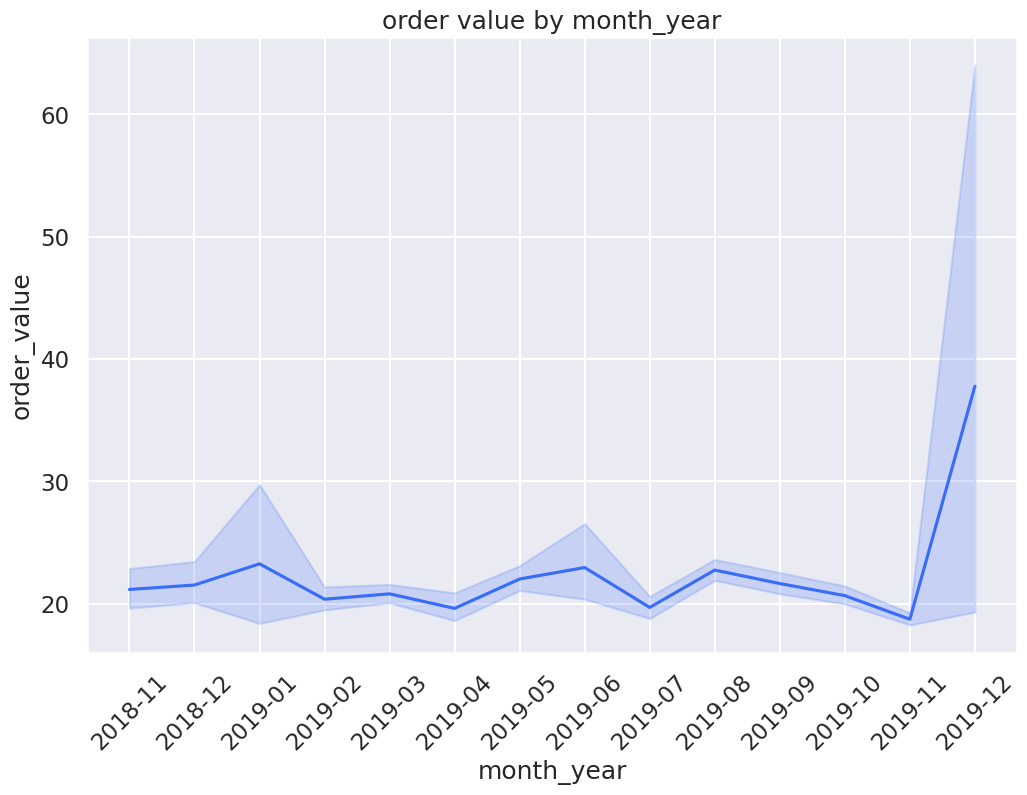

In [828]:
#plot sales over time
plt.figure(figsize=(12,8))
sns.lineplot(data=ecom, y='order_value', x='month_year')
plt.title('order value by month_year')
plt.xticks(rotation=45)
plt.show()


    steady first 5 months, a drop of one month in March 2019 and recovery. Next spike on sales in August 2019 and another rise in november peaking in December 2019.

### average order value over time

In [831]:
#grouping average order value by month
average_order_value = ecom.groupby('month_year')['order_value'].mean().reset_index().round(2)
average_order_value

month_year  order_value
0     2018-11        21.15
1     2018-12        21.52
2     2019-01        23.25
3     2019-02        20.36
4     2019-03        20.80
5     2019-04        19.61
6     2019-05        22.01
7     2019-06        22.95
8     2019-07        19.68
9     2019-08        22.74
10    2019-09        21.64
11    2019-10        20.65
12    2019-11        18.72
13    2019-12        37.77

In [832]:
average_order_value.min()

month_year     2018-11
order_value      18.72
dtype: object

In [833]:
average_order_value.max()

month_year     2019-12
order_value      37.77
dtype: object

In [834]:
#average order value over time
mean_order_value = average_order_value['order_value'].mean()
mean_order_value

22.34642857142857

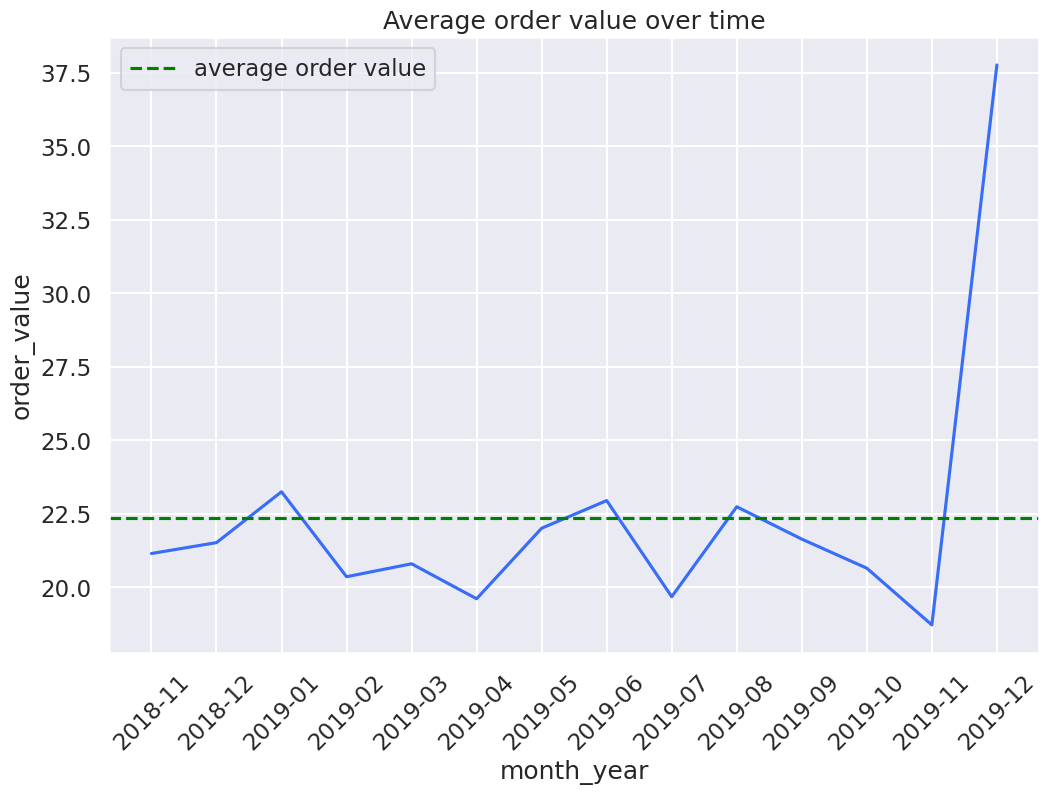

In [835]:
#average order value over time plot
plt.figure(figsize=(12,8))
sns.lineplot(data=average_order_value, x='month_year', y='order_value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='average order value')
plt.xticks(rotation=45)
plt.title('Average order value over time')
plt.legend()
plt.show()


    Mostly time sales are under average. Average which is pushed up by huge spike in sales in december/2019

### average volume order

In [838]:
#grouping average quantity order
qty_mean = ecom.groupby('month_year')['quantity'].mean().reset_index().round(2)
qty_mean

month_year  quantity
0     2018-11     13.50
1     2018-12      8.42
2     2019-01     13.39
3     2019-02     10.68
4     2019-03     11.59
5     2019-04     10.90
6     2019-05     11.13
7     2019-06     12.37
8     2019-07     10.72
9     2019-08     12.74
10    2019-09     11.49
11    2019-10     11.44
12    2019-11      9.54
13    2019-12     17.84

In [839]:
qty_mean.min()

month_year    2018-11
quantity         8.42
dtype: object

In [840]:
qty_mean.max()

month_year    2019-12
quantity        17.84
dtype: object

In [841]:
#average basket size
average_basket_size = qty_mean['quantity'].mean()
average_basket_size

11.839285714285714

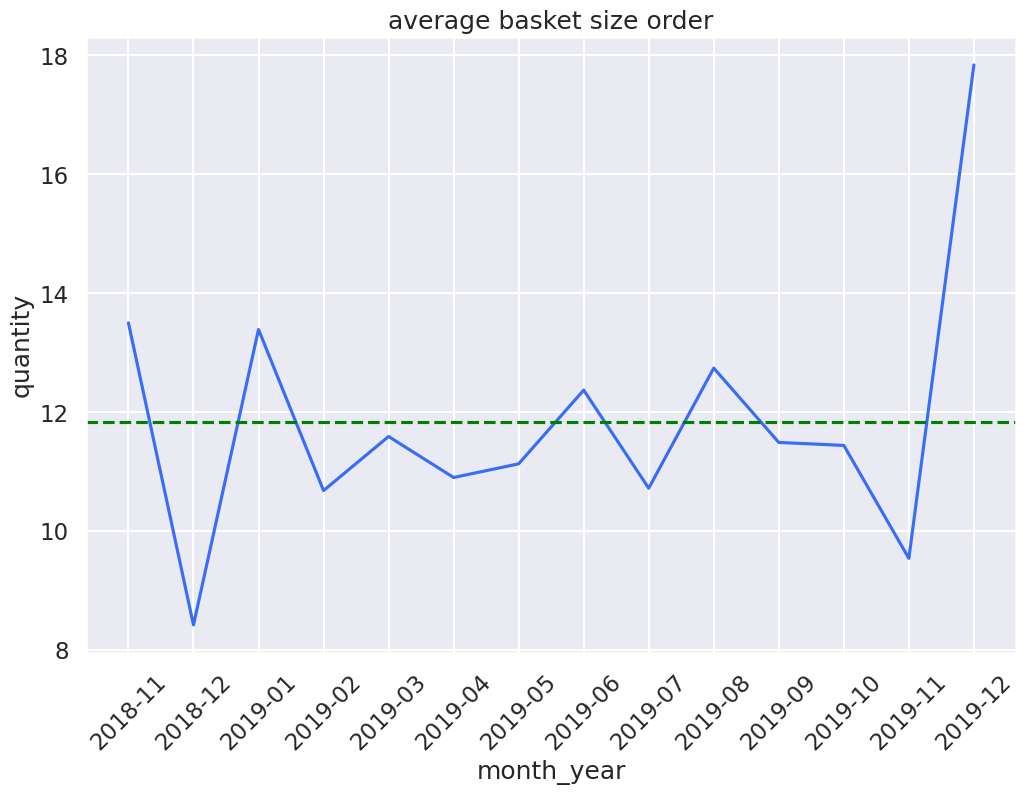

In [842]:
#average basket size order plot
plt.figure(figsize=(12,8))
sns.lineplot(data=qty_mean, x='month_year', y='quantity')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='average basket size')
plt.xticks(rotation=45)
plt.title('average basket size order')
plt.show()

    december/2018 was low in quantity, we see ups and downs quantity order along the year but travelling close to history average. A deep drop november/2018 and spike in december/2019

### top revenue products

    what are the top revenue products ? 

In [846]:
top10_products = ecom.groupby('description')[['quantity','order_value']].sum().reset_index().sort_values(by='order_value', ascending=False).head(10)
top10_products

description  quantity  order_value
2348         PAPER CRAFT , LITTLE BIRDIE    161990    336939.20
167                           AMAZON FEE        34    249042.68
2157                              Manual     11057    224537.28
1049                      DOTCOM POSTAGE       709    206252.06
2791            REGENCY CAKESTAND 3 TIER     14717    183853.59
2019      MEDIUM CERAMIC TOP STORAGE JAR    152527    159180.56
3761  WHITE HANGING HEART T-LIGHT HOLDER     40454    112861.02
2374                       PARTY BUNTING     18564    100646.58
1786             JUMBO BAG RED RETROSPOT     49490     96143.83
2637                             POSTAGE      3297     89973.12

In [847]:
top10_products['percentage'] = percentage_calculation(top10_products['order_value'],top10_products['order_value'].sum())
top10_products

description  quantity  order_value  percentage
2348         PAPER CRAFT , LITTLE BIRDIE    161990    336939.20   19.150476
167                           AMAZON FEE        34    249042.68   14.154737
2157                              Manual     11057    224537.28   12.761934
1049                      DOTCOM POSTAGE       709    206252.06   11.722664
2791            REGENCY CAKESTAND 3 TIER     14717    183853.59   10.449611
2019      MEDIUM CERAMIC TOP STORAGE JAR    152527    159180.56    9.047280
3761  WHITE HANGING HEART T-LIGHT HOLDER     40454    112861.02    6.414636
2374                       PARTY BUNTING     18564    100646.58    5.720409
1786             JUMBO BAG RED RETROSPOT     49490     96143.83    5.464488
2637                             POSTAGE      3297     89973.12    5.113765

    postage is almost 18% of top 10 revenue products. cake stand 3 tier is around 15%, paper craft, little birdie come in 3rd with around 14%

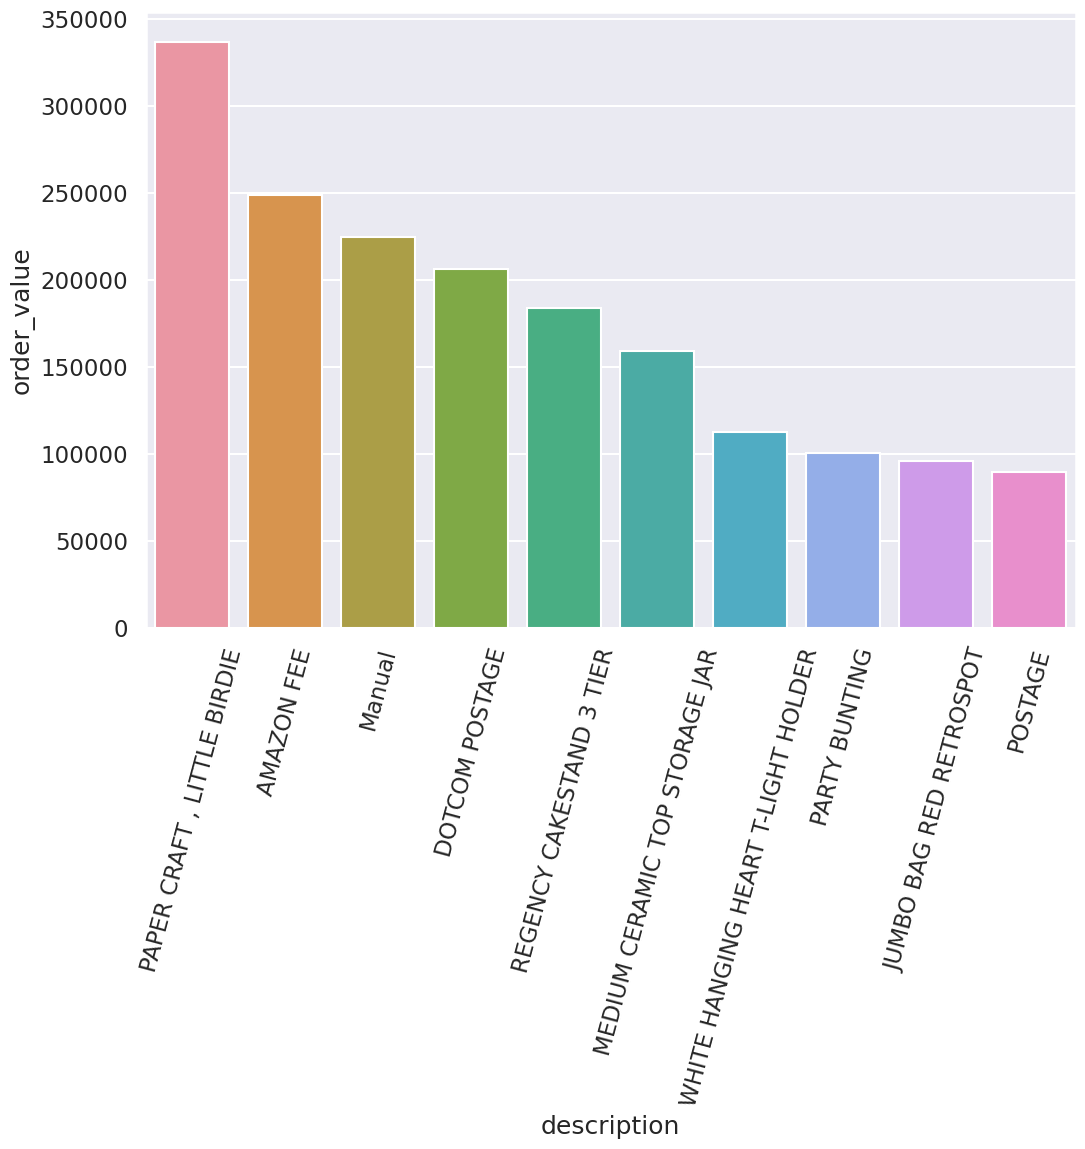

In [849]:
#bar plot of most popular products
plt.figure(figsize=(12,8))
sns.barplot(data=top10_products, x='description', y='order_value')
plt.xticks(rotation=75)
plt.show()

    dotcom postage and postage shows that a big part of revenue comes from postage fees.

### top quantity products

In [852]:
top10_quantity = ecom.groupby('description')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(10)
top10_quantity

description  quantity
2348         PAPER CRAFT , LITTLE BIRDIE    161990
2019      MEDIUM CERAMIC TOP STORAGE JAR    152527
3850   WORLD WAR 2 GLIDERS ASSTD DESIGNS     56151
1786             JUMBO BAG RED RETROSPOT     49490
3761  WHITE HANGING HEART T-LIGHT HOLDER     40454
2625                      POPCORN HOLDER     37176
2299     PACK OF 72 RETROSPOT CAKE CASES     36776
236        ASSORTED COLOUR BIRD ORNAMENT     36442
2684                  RABBIT NIGHT LIGHT     30847
2074             MINI PAINT SET VINTAGE      26829

In [853]:
top10_quantity['percentage'] = percentage_calculation(top10_quantity['quantity'], top10_quantity['quantity'].sum())
top10_quantity

description  quantity  percentage
2348         PAPER CRAFT , LITTLE BIRDIE    161990   25.766604
2019      MEDIUM CERAMIC TOP STORAGE JAR    152527   24.261391
3850   WORLD WAR 2 GLIDERS ASSTD DESIGNS     56151    8.931542
1786             JUMBO BAG RED RETROSPOT     49490    7.872024
3761  WHITE HANGING HEART T-LIGHT HOLDER     40454    6.434732
2625                      POPCORN HOLDER     37176    5.913323
2299     PACK OF 72 RETROSPOT CAKE CASES     36776    5.849698
236        ASSORTED COLOUR BIRD ORNAMENT     36442    5.796571
2684                  RABBIT NIGHT LIGHT     30847    4.906614
2074             MINI PAINT SET VINTAGE      26829    4.267499

    paper craft, little birdie is 17% of quantity of top 10 products, medium ceramic jar is 16%, WW2 gliders desings is 11%

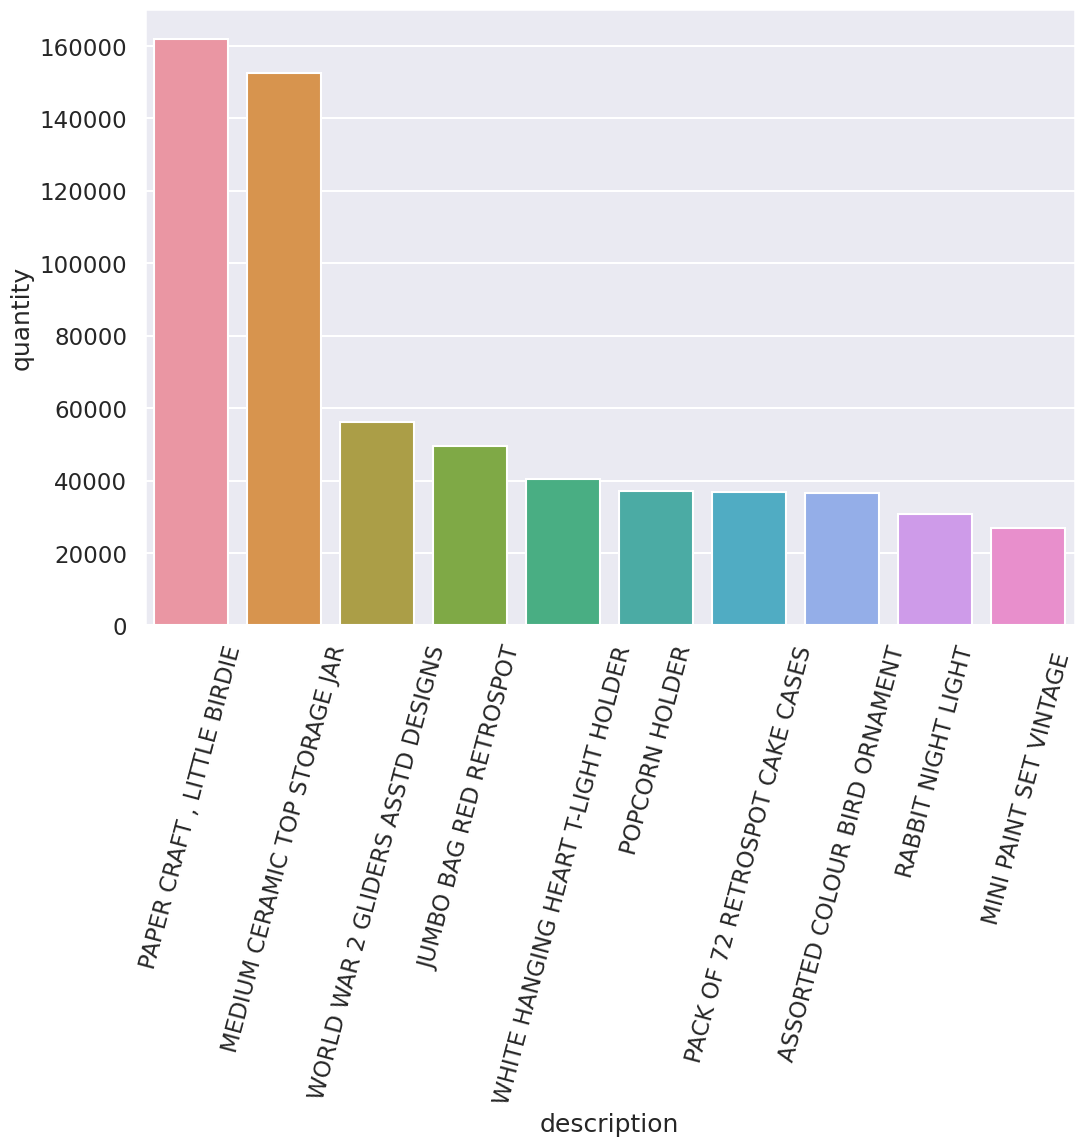

In [855]:
plt.figure(figsize=(12,8))
sns.barplot(data=top10_quantity, x='description', y='quantity')
plt.xticks(rotation=75)
plt.show()

    decorations, storage and party products make the most popular products

### sales comparison Nov/Dec

In [858]:
#querying november and december 2018
nov_dec_18 = ecom.query('month_year == "2018-11" or month_year == "2018-12"')
nov_dec_18.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

In [859]:
#grouping by sales
nov_dec_18_sales = nov_dec_18.groupby('month_year')['order_value'].sum().reset_index()
nov_dec_18_sales['year'] = 2018
nov_dec_18_sales

month_year  order_value  year
0    2018-11    106493.41  2018
1    2018-12    776113.53  2018

In [860]:
#querying november and december 2019
nov_dec_19 = ecom.query('month_year == "2019-11" or month_year == "2019-12"')
nov_dec_19.head()

invoice_no stock_code                          description  quantity  \
436091     574086      22371         AIRLINE BAG VINTAGE TOKYO 78         8   
436092     574086      22376    AIRLINE BAG VINTAGE JET SET WHITE         4   
436093     574086      22374      AIRLINE BAG VINTAGE JET SET RED         4   
436094     574086      22372  AIRLINE BAG VINTAGE WORLD CHAMPION          4   
436095     574086      22713                  CARD I LOVE LONDON         12   

              invoice_date  unit_price  customer_id  order_value month_year  \
436091 2019-11-01 08:39:00        4.25      15651.0        34.00    2019-11   
436092 2019-11-01 08:39:00        4.25      15651.0        17.00    2019-11   
436093 2019-11-01 08:39:00        4.25      15651.0        17.00    2019-11   
436094 2019-11-01 08:39:00        4.25      15651.0        17.00    2019-11   
436095 2019-11-01 08:39:00        0.42      15651.0         5.04    2019-11   

              date  year  day price_category  
436091  2019-11-01  2019    4          cheap  
436092  2019-11-01  2019    4          cheap  
436093  2019-11-01  2019    4          cheap  
436094  2019-11-01  2019    4          cheap  
436095  2019-11-01  2019    4          cheap

In [861]:
#grouping by sales
nov_dec_19_sales = nov_dec_19.groupby('month_year')['order_value'].sum().reset_index()
nov_dec_19_sales['year'] = 2019
nov_dec_19_sales

month_year  order_value  year
0    2019-11   1567570.09  2019
1    2019-12    729112.46  2019

In [862]:
#concatenating tables
comparison = pd.concat([nov_dec_18_sales, nov_dec_19_sales])
comparison

month_year  order_value  year
0    2018-11    106493.41  2018
1    2018-12    776113.53  2018
0    2019-11   1567570.09  2019
1    2019-12    729112.46  2019

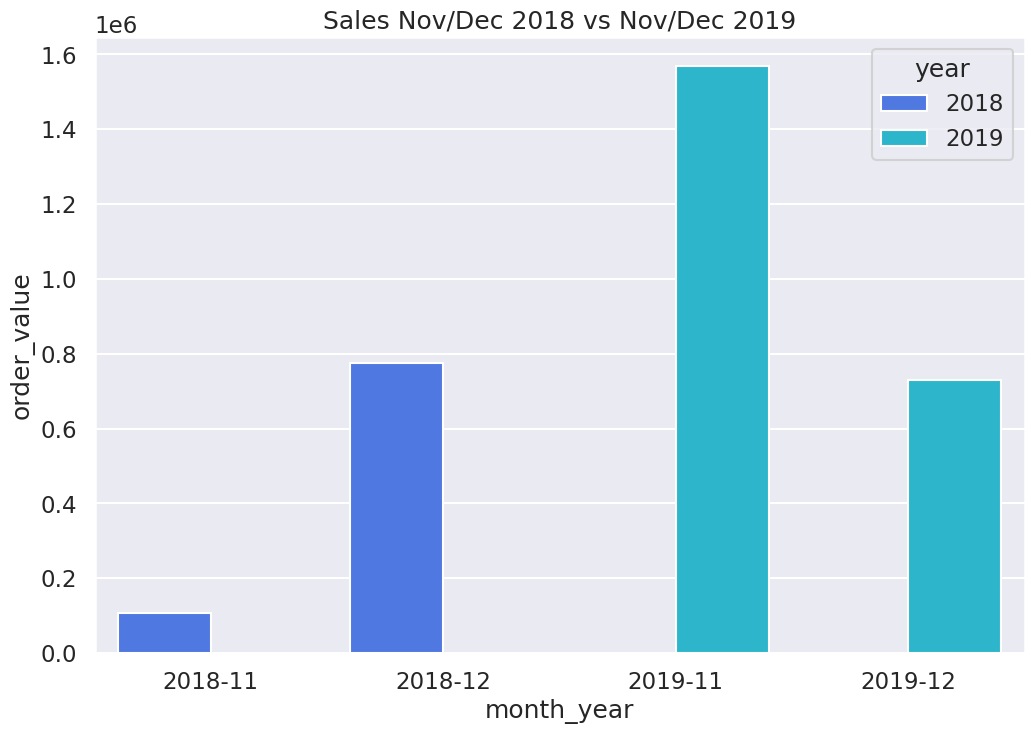

In [863]:
#bar plot of comparison 
plt.figure(figsize=(12,8))
sns.barplot(data=comparison, x='month_year', y='order_value', hue='year')
plt.title('Sales Nov/Dec 2018 vs Nov/Dec 2019')
plt.show()

    We can see a very shy start of company data history. 
    We could say the company have started in november 2018 due to comparison with sales from november next year.
    Sales from 2018 december are higher when compared with 2019.

In [865]:
ecom.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

### price category sales average

In [867]:
price_category_sales_mean = ecom.groupby('price_category')['order_value'].mean().reset_index()
price_category_sales_mean

price_category  order_value
0      affordable   285.436088
1           cheap    20.130955
2       expensive  2094.028721
3       high-cost   994.688425
4        low-cost   139.270543
5  very expensive  9686.049000

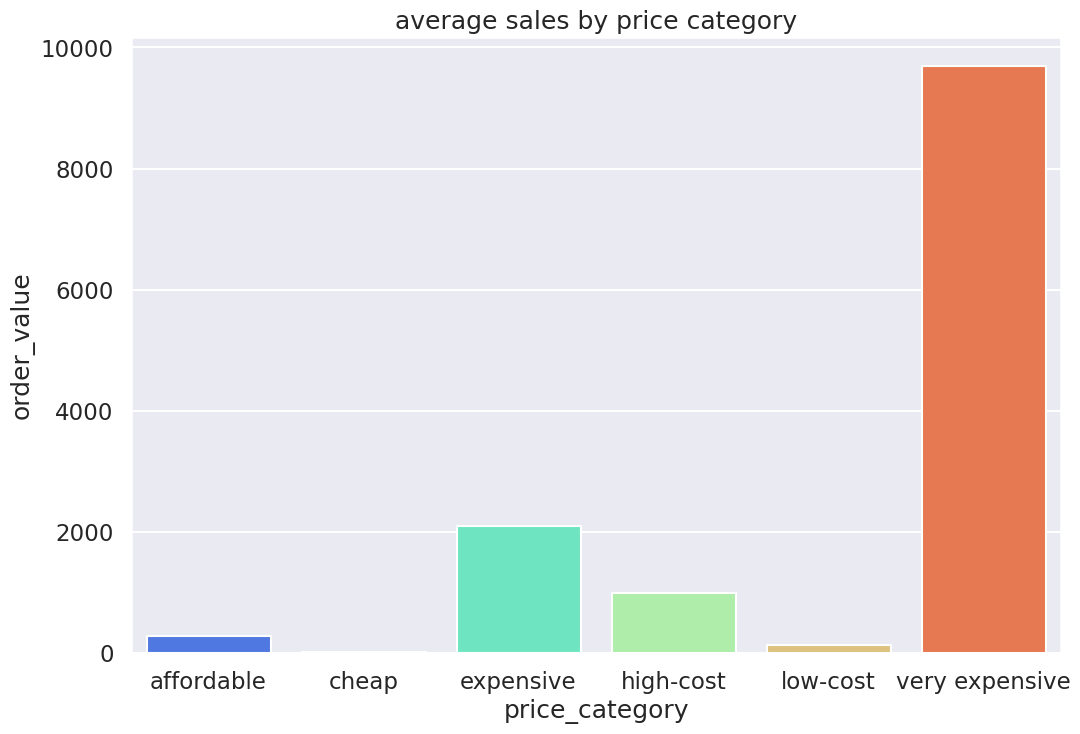

In [868]:
plt.figure(figsize=(12,8))
sns.barplot(data=price_category_sales_mean, x='price_category', y='order_value')
plt.title('average sales by price category')
plt.show()

    very expensive products make the highest average category in order value.

### price category total sales

In [871]:
price_category_sales_sum = ecom.groupby('price_category')['order_value'].sum().reset_index().round(2)

In [872]:
price_category_sales_sum['percentage'] = percentage_calculation(price_category_sales_sum['order_value'], price_category_sales_sum['order_value'].sum()).round(2)
price_category_sales_sum.sort_values(by='percentage', ascending=False)

price_category  order_value  percentage
1           cheap  10611288.32       93.17
5  very expensive    290581.47        2.55
2       expensive    180086.47        1.58
3       high-cost    126325.43        1.11
4        low-cost     97489.38        0.86
0      affordable     83918.21        0.74

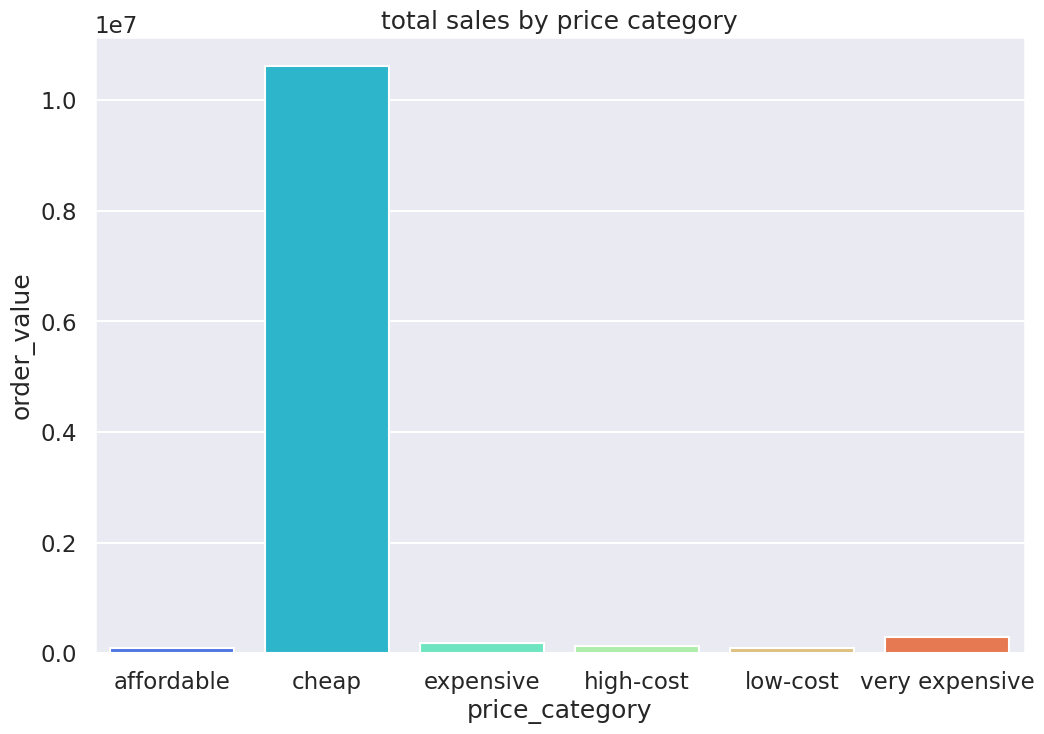

In [873]:
plt.figure(figsize=(12,8))
sns.barplot(data=price_category_sales_sum, x='price_category', y='order_value')
plt.title('total sales by price category')
plt.show()

    cheap items make the most popular price category order of all sales

### canceled orders

In [876]:
canceled_orders.head()

invoice_no stock_code                        description  quantity  \
87      536378     85099C     JUMBO  BAG BAROQUE BLACK WHITE        10   
91      536378     84997C  BLUE 3 PIECE POLKADOT CUTLERY SET         6   
121     536381     37444C     PINK BREAKFAST CUP AND SAUCER          1   
154    C536383     35004C    SET OF 3 COLOURED  FLYING DUCKS         1   
176     536386     85099C     JUMBO  BAG BAROQUE BLACK WHITE       100   

           invoice_date  unit_price  customer_id  order_value month_year  \
87  2018-11-29 09:37:00        1.95      14688.0        19.50    2018-11   
91  2018-11-29 09:37:00        3.75      14688.0        22.50    2018-11   
121 2018-11-29 09:41:00        2.95      15311.0         2.95    2018-11   
154 2018-11-29 09:49:00        4.65      15311.0         4.65    2018-11   
176 2018-11-29 09:57:00        1.65      16029.0       165.00    2018-11   

           date  year  day price_category  
87   2018-11-29  2018    3          cheap  
91   2018-11-29  2018    3          cheap  
121  2018-11-29  2018    3          cheap  
154  2018-11-29  2018    3          cheap  
176  2018-11-29  2018    3          cheap

In [877]:
canceled_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, 87 to 541809
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      6834 non-null   object        
 1   stock_code      6834 non-null   object        
 2   description     6834 non-null   object        
 3   quantity        6834 non-null   int64         
 4   invoice_date    6834 non-null   datetime64[ns]
 5   unit_price      6834 non-null   float64       
 6   customer_id     4277 non-null   float64       
 7   order_value     6834 non-null   float64       
 8   month_year      6834 non-null   object        
 9   date            6834 non-null   object        
 10  year            6834 non-null   int32         
 11  day             6834 non-null   int32         
 12  price_category  6834 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)
memory usage: 694.1+ KB


#### products

In [879]:
#top canceled orders products
canceled_products = top_mean(canceled_orders, 'description', 'order_value')

In [880]:
#adding percentage column
canceled_products['percentage'] = percentage_calculation(canceled_products['order_value'], canceled_products['order_value'].sum())
canceled_products

description  order_value  percentage
42                       CRUK Commission       495.84   47.845302
33                          Bank Charges       202.86   19.574657
49                  DOORMAT BLACK FLOCK         51.99    5.016693
35                              CARRIAGE        49.76    4.801513
138      SET OF 3 COLOURED  FLYING DUCKS        43.80    4.226412
113                 PINK RIVIERA HANDBAG        43.61    4.208078
39       CHILDRENS CUTLERY POLKADOT BLUE        42.00    4.052724
21     BLUE 3 PIECE POLKADOT CUTLERY SET        41.71    4.024741
137  SET OF 16 VINTAGE PISTACHIO CUTLERY        34.31    3.310690
161  WHITE TALL PORCELAIN T-LIGHT HOLDER        30.46    2.939190

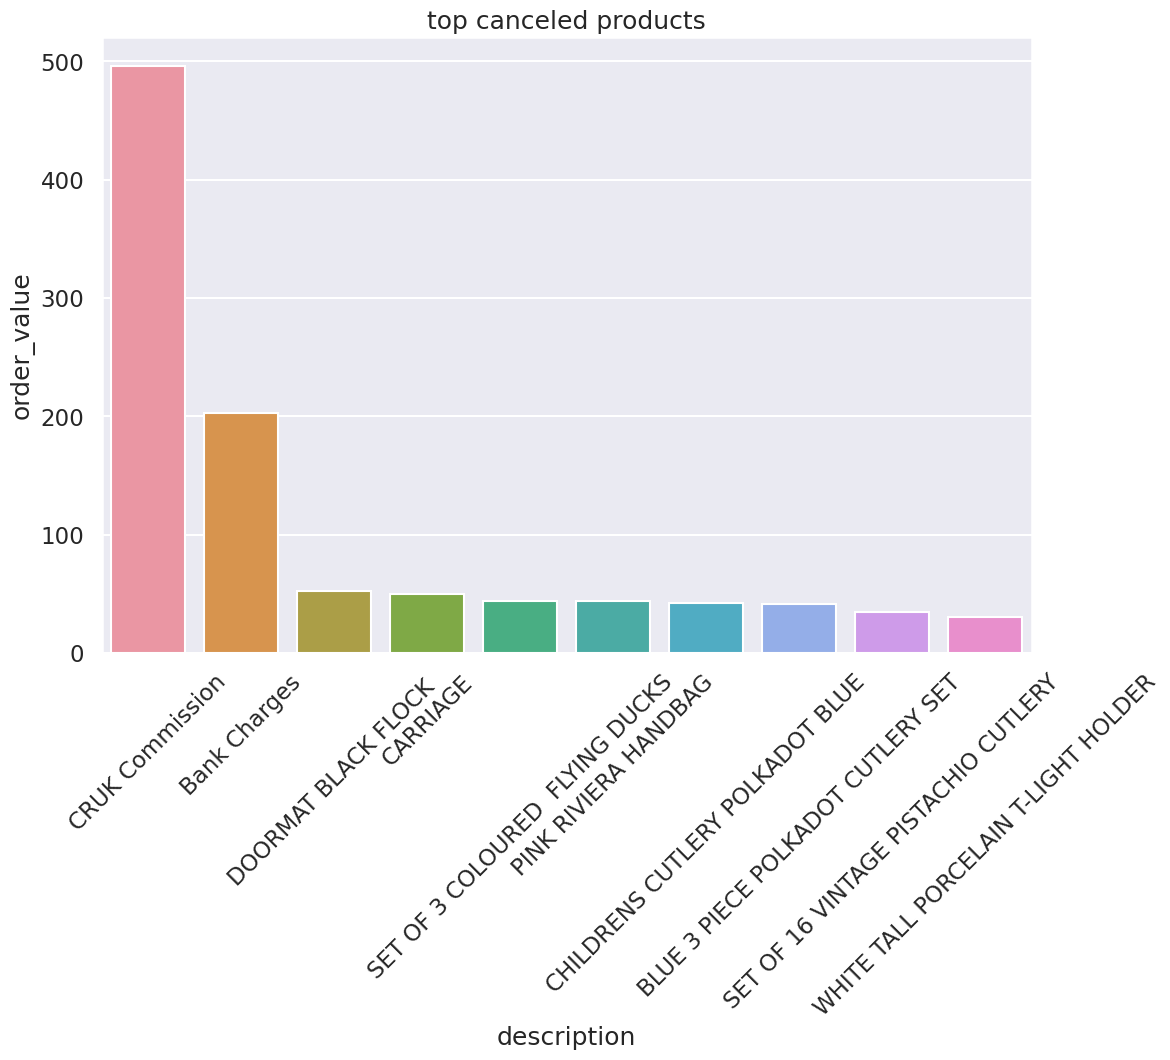

In [881]:
#top canceled products
plt.figure(figsize=(12,8))
sns.barplot(data=canceled_products, x='description', y='order_value')
plt.title('top canceled products')
plt.xticks(rotation=45)
plt.show()

    comission and bank charges are top description as canceled orders generate charges and fee refunds. After that we see top 8 most canceled orders.

#### price category

In [884]:
#price category canceled
canceled_category = top_sum(canceled_orders, 'price_category', 'order_value')

In [885]:
canceled_category['percentage'] = percentage_calculation(canceled_category['order_value'], canceled_category['order_value'].sum())
canceled_category

price_category  order_value  percentage
1          cheap    120094.10   88.735643
3      high-cost      5714.99    4.222716
0     affordable      5178.47    3.826290
2      expensive      3189.34    2.356553
4       low-cost      1162.29    0.858798

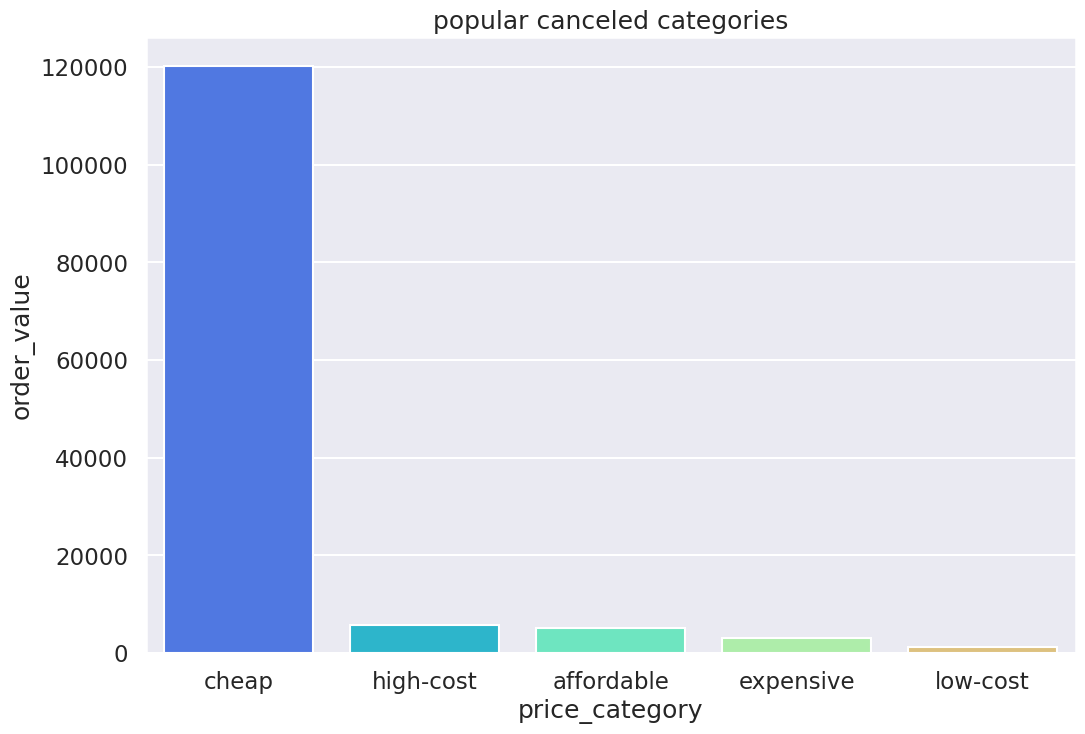

In [886]:
plt.figure(figsize=(12,8))
sns.barplot(data=canceled_category, x='price_category', y='order_value')
plt.title('popular canceled categories')
plt.show()

    cheap items are almost 89% of all canceled orders, followed by high-cost, afordable and expensive in between 4% and 2%. Low cost are the least canceled category.

#### average order value per month

In [889]:
#average canceled order value per month
canceled_month = top_mean(canceled_orders, 'month_year', 'order_value', top_n=14)
canceled_month.sort_values(by='month_year', inplace=True)
canceled_month

month_year  order_value
0     2018-11        20.69
1     2018-12        17.76
2     2019-01        17.18
3     2019-02        17.27
4     2019-03        17.95
5     2019-04        17.12
6     2019-05        22.61
7     2019-06        22.50
8     2019-07        21.62
9     2019-08        20.85
10    2019-09        23.01
11    2019-10        20.67
12    2019-11        22.09
13    2019-12        13.54

In [890]:
#average of all canceled orders
mean_canceled_month = canceled_month['order_value'].mean()
mean_canceled_month

19.632857142857144

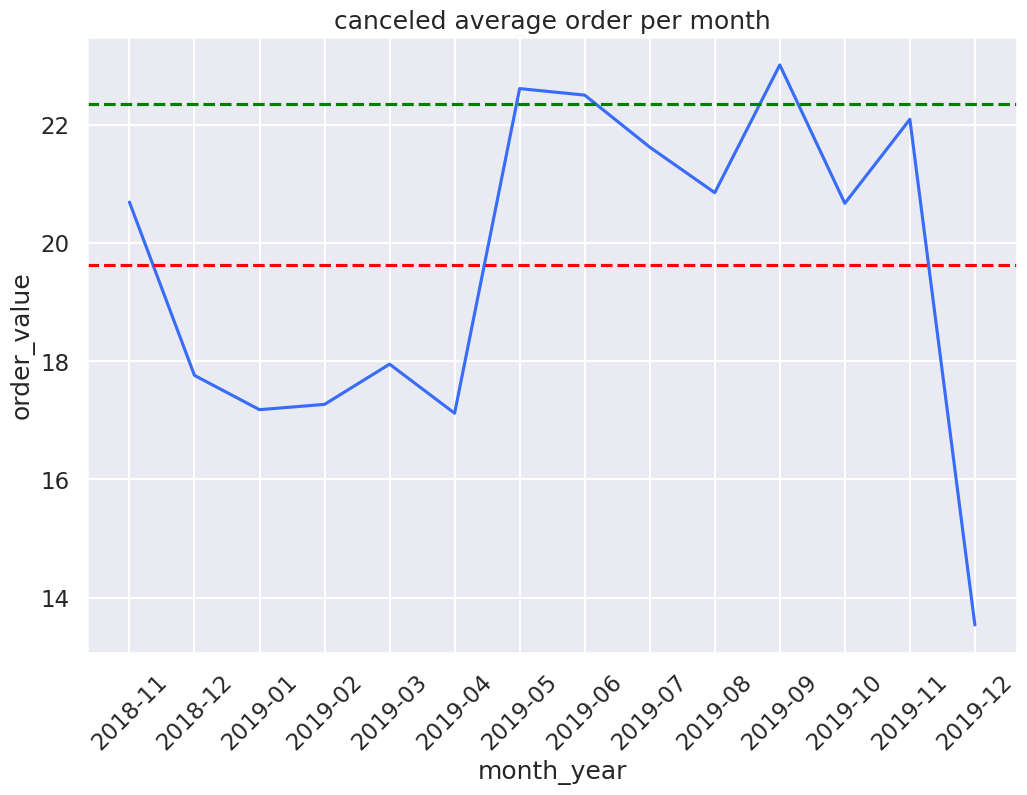

In [891]:
#canceled average order plot
plt.figure(figsize=(12,8))
sns.lineplot(data=canceled_month, x='month_year', y='order_value')
plt.axhline(y=mean_canceled_month, color='r', linestyle='--', label='average canceled order')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.title('canceled average order per month')
plt.xticks(rotation=45)
plt.show()

    huge problem with canceled orders value between may/2019 and november/2019. at some stage peaking above order average.

#### total

In [894]:
#total orders canceled
len(canceled_orders)

6834

In [895]:
#total orders completed
len(ecom)

528350

In [896]:
#percentage amount of orders canceled
(len(canceled_orders) / len(ecom)) * 100

1.2934607741080724

In [897]:
#total amount of lost revenue
canceled_orders['order_value'].sum().round(2)

135339.19

In [898]:
#total net revenue
ecom['order_value'].sum().round(2)

11389689.28

In [899]:
#percentage of canceled orders
(canceled_orders['order_value'].sum().round(2) / ecom['order_value'].sum().round(2)) * 100

1.1882605984489159

## Analysis per segment

### best customers

In [902]:
bc = rfm_seg.query('RFM_score == "444"').reset_index()
bc.head()

customer_id  recency  frequency  monetary  R_quartile  F_quartile  \
0      12347.0        2        179   4256.90           4           4   
1      12359.0        7        249   6407.88           4           4   
2      12362.0        3        274   5297.88           4           4   
3      12388.0       15        100   2780.66           4           4   
4      12395.0       15        159   3038.98           4           4   

   M_quartile RFM_score  
0           4       444  
1           4       444  
2           4       444  
3           4       444  
4           4       444

In [903]:
#best customers id
best_customers_id = bc['customer_id'].tolist()

In [904]:
#querying best customers from main Data Frame
best_customers = ecom.query('customer_id == @best_customers_id')
best_customers.head()

invoice_no stock_code                      description  quantity  \
26     536370      22728        ALARM CLOCK BAKELIKE PINK        24   
27     536370      22727        ALARM CLOCK BAKELIKE RED         24   
28     536370      22726       ALARM CLOCK BAKELIKE GREEN        12   
29     536370      21724  PANDA AND BUNNIES STICKER SHEET        12   
30     536370      21883                 STARS GIFT TAPE         24   

          invoice_date  unit_price  customer_id  order_value month_year  \
26 2018-11-29 08:45:00        3.75      12583.0         90.0    2018-11   
27 2018-11-29 08:45:00        3.75      12583.0         90.0    2018-11   
28 2018-11-29 08:45:00        3.75      12583.0         45.0    2018-11   
29 2018-11-29 08:45:00        0.85      12583.0         10.2    2018-11   
30 2018-11-29 08:45:00        0.65      12583.0         15.6    2018-11   

          date  year  day price_category  
26  2018-11-29  2018    3          cheap  
27  2018-11-29  2018    3          cheap  
28  2018-11-29  2018    3          cheap  
29  2018-11-29  2018    3          cheap  
30  2018-11-29  2018    3          cheap

#### products

In [906]:
#grouping product description by average order_value
bc_products = best_customers.groupby('description')['order_value'].mean().round(2).reset_index().sort_values(by='order_value', ascending=False).head(10)

In [907]:
#adding percentage column
bc_products['percentage'] = percentage_calculation(bc_products['order_value'], bc_products['order_value'].sum()).round(2)
bc_products

description  order_value  percentage
1381       HALL CABINET WITH 3 DRAWERS      1201.81       18.54
1876       MISELTOE HEART WREATH CREAM       996.00       15.36
932                     DOTCOM POSTAGE       744.15       11.48
2815  SET/5 RED SPOTTY LID GLASS BOWLS       734.40       11.33
2347    POTTING SHED CANDLE CITRONELLA       625.41        9.65
3253       VINTAGE POST OFFICE CABINET       527.70        8.14
3185         UTILTY CABINET WITH HOOKS       516.67        7.97
2071             PANTRY CHOPPING BOARD       429.92        6.63
2348          POTTING SHED ROSE CANDLE       353.54        5.45
2637  SET 3 WICKER OVAL BASKETS W LIDS       353.36        5.45

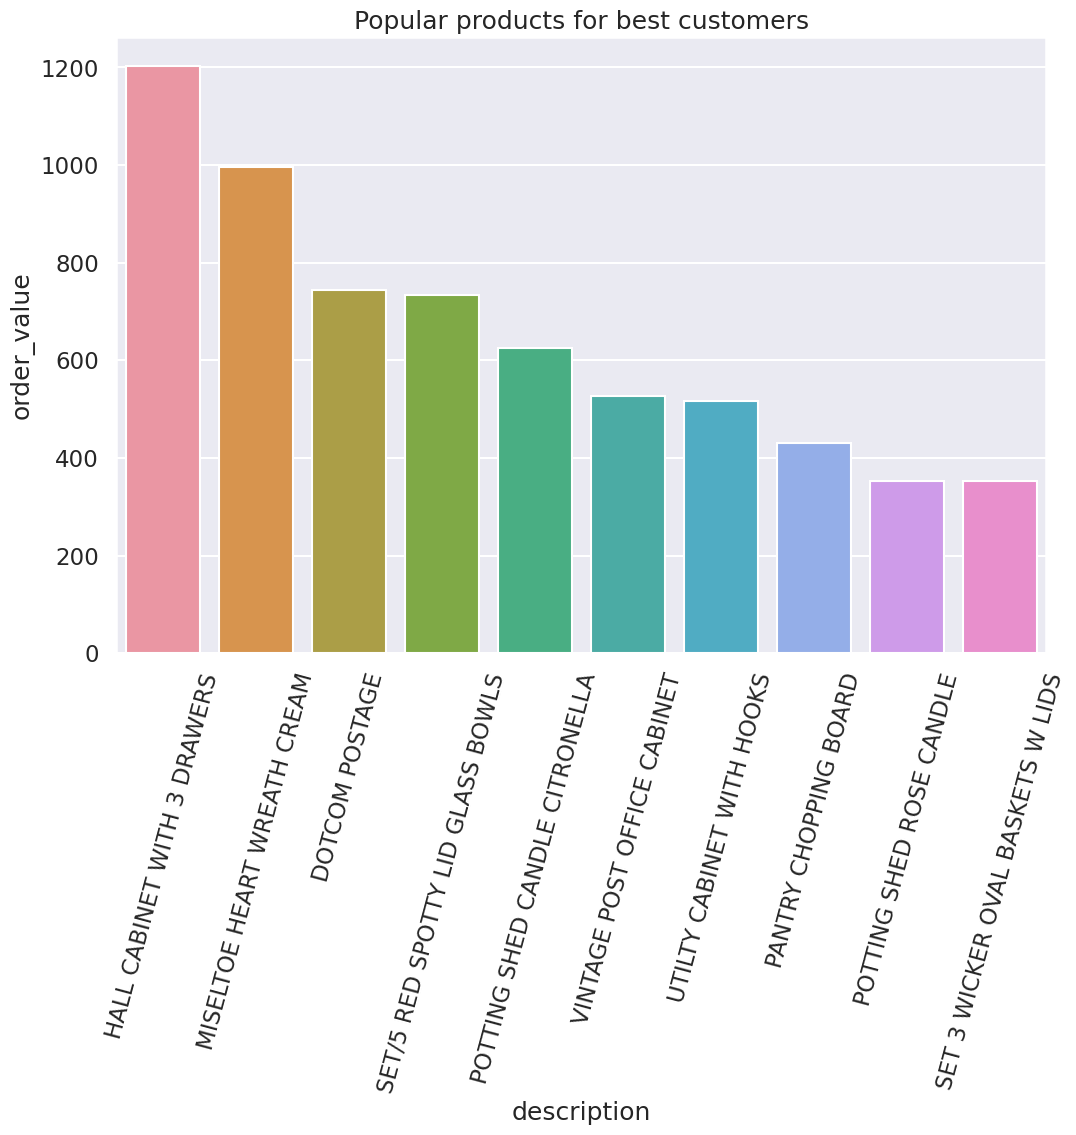

In [908]:
#plot popular best customers' popular products
plt.figure(figsize=(12,8))
sns.barplot(data=bc_products, x='description',y='order_value')
plt.title('Popular products for best customers')
plt.xticks(rotation=75)
plt.show()

#### price category

In [910]:
#grouping price category sum for best customers
bc_category = best_customers.groupby('price_category')['order_value'].sum().reset_index().sort_values(by='order_value', ascending=False)

In [911]:
#adding percentage column
bc_category['percentage'] = percentage_calculation(bc_category['order_value'], bc_category['order_value'].sum()).round(2)
bc_category

price_category  order_value  percentage
1          cheap   4193622.56       98.30
2      expensive     46580.80        1.09
4       low-cost     12045.43        0.28
3      high-cost     10783.74        0.25
0     affordable      3129.00        0.07

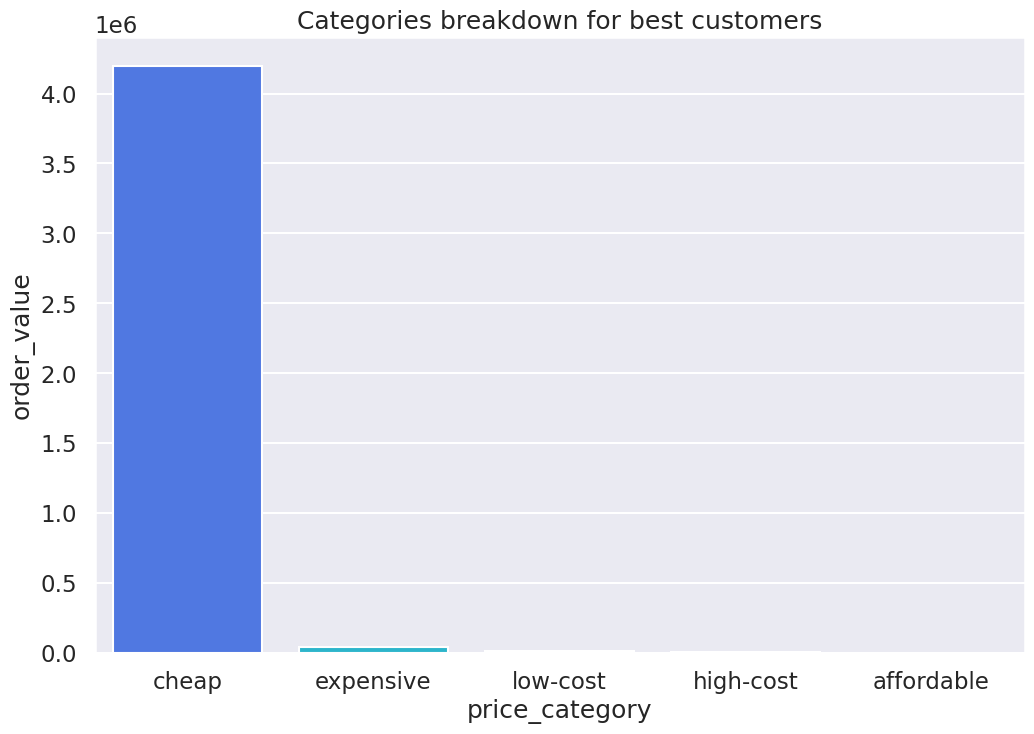

In [912]:
#plot categories for best customers
plt.figure(figsize=(12,8))
sns.barplot(data=bc_category, x='price_category', y='order_value')
plt.title('Categories breakdown for best customers')
plt.show()

    cheap itemns are 98% of produts best customers buy followed by expensive items at 1%. All other categories are less than 1%. 

#### average order value

In [915]:
#grouping average order value for best customers
bc_month = best_customers.groupby('month_year')['order_value'].mean().reset_index().round(2)
bc_month

month_year  order_value
0     2018-11        36.11
1     2018-12        27.71
2     2019-01        26.62
3     2019-02        26.47
4     2019-03        26.56
5     2019-04        21.08
6     2019-05        28.05
7     2019-06        25.63
8     2019-07        25.42
9     2019-08        26.91
10    2019-09        29.40
11    2019-10        27.23
12    2019-11        22.16
13    2019-12        22.73

In [916]:
#average order value for best customers
mean_bc_value = bc_month['order_value'].mean()
mean_bc_value

26.57714285714286

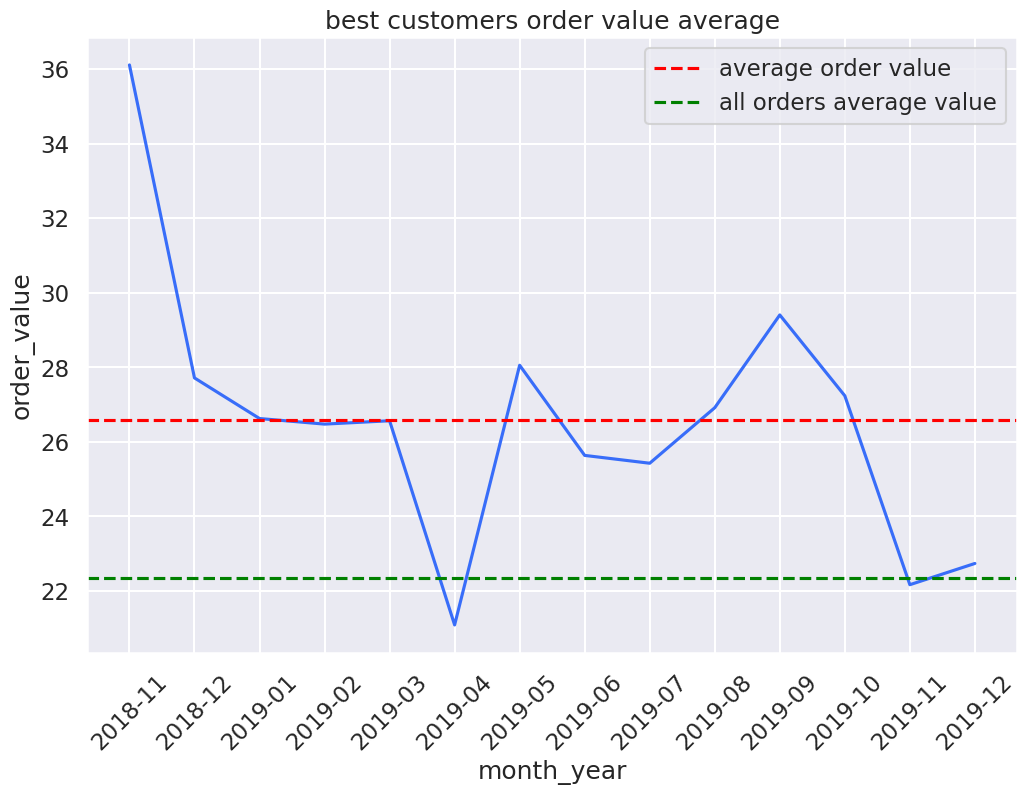

In [917]:
#plot of average order_value for best customers
plt.figure(figsize=(12,8))
sns.lineplot(data=bc_month, x='month_year', y='order_value')
plt.axhline(y=mean_bc_value, color='r', linestyle='--', label='average order value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('best customers order value average')
plt.legend()
plt.show()

    from a huge start on order value average in november/2018 and steady few months until a deep drop in april/2019. It boucend back up and it was reasonable until another drop in november/2019. All this compared with the average sales of this segment. When comparing to all orders average, it remained above average 12 out of 14 months in data history.

#### average basket size

In [920]:
#average basket size per month for best customers
bc_quantity = top_mean(best_customers, 'month_year', 'quantity', top_n=14)
bc_quantity.sort_values(by='month_year', inplace=True)
bc_quantity

month_year  quantity
0     2018-11     30.22
1     2018-12     14.43
2     2019-01     14.87
3     2019-02     15.11
4     2019-03     15.21
5     2019-04     13.44
6     2019-05     14.96
7     2019-06     14.97
8     2019-07     14.32
9     2019-08     15.98
10    2019-09     14.73
11    2019-10     14.54
12    2019-11     11.86
13    2019-12     13.10

In [921]:
#average basket size for best customers
bc_avg_basket = bc_quantity['quantity'].mean()
bc_avg_basket

15.552857142857137

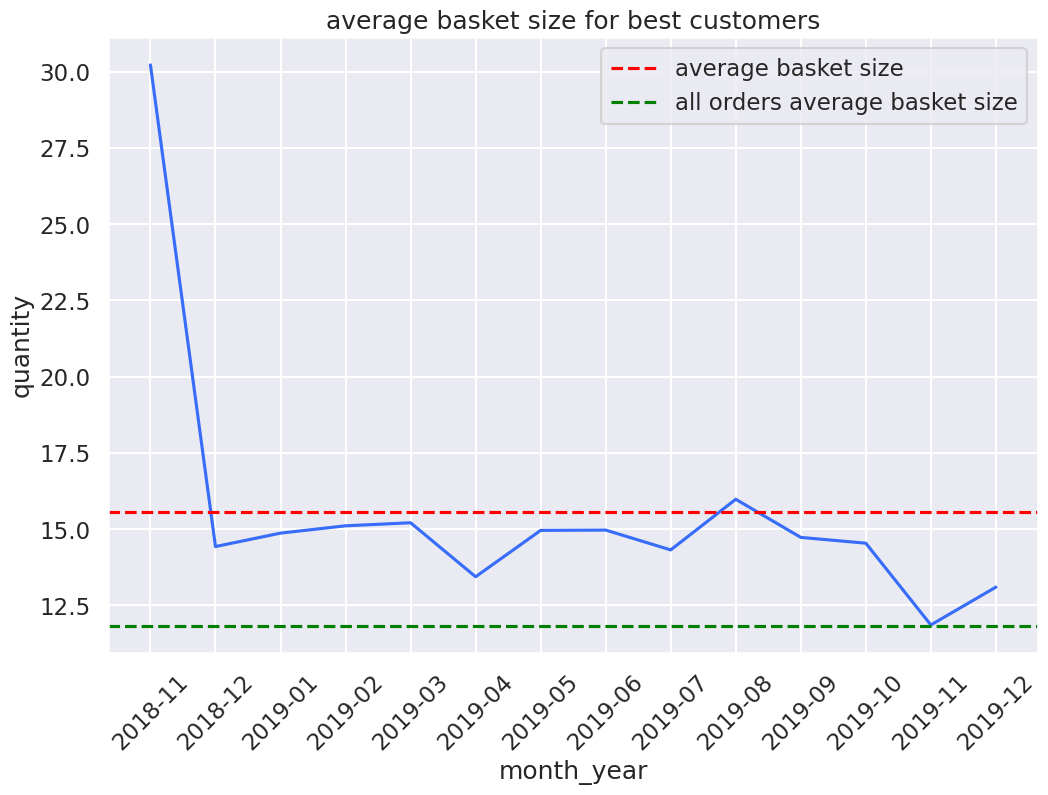

In [922]:
#quantity average for best customer plot
plt.figure(figsize=(12,8))
sns.lineplot(data=bc_quantity, x='month_year', y='quantity')
plt.axhline(y=bc_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='all orders average basket size')
plt.title('average basket size for best customers')
plt.legend()
plt.xticks(rotation=45)
plt.show()

    quantity average started high in november/2018, stayed above all orders average throuout the whole year of 2019. It droped from its own segment average from august/2018 to novemeber/2019.

### loyal customers

In [925]:
lc = rfm_seg.query('F_quartile == 4').reset_index()
lc.head()

customer_id  recency  frequency  monetary  R_quartile  F_quartile  \
0      12347.0        2        179   4256.90           4           4   
1      12357.0       33        131   6207.67           3           4   
2      12359.0        7        249   6407.88           4           4   
3      12360.0       52        128   2645.46           2           4   
4      12362.0        3        274   5297.88           4           4   

   M_quartile RFM_score  
0           4       444  
1           4       344  
2           4       444  
3           4       244  
4           4       444

In [926]:
#loyal customers id
lc_id = lc['customer_id'].tolist()

In [927]:
#querying best customers from main Data Frame
loyal_customers = ecom.query('customer_id == @lc_id')
loyal_customers.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

#### products

In [929]:
#top mean order value products for loyal customers
lc_products = top_mean(loyal_customers, 'description', 'order_value')

In [930]:
#adding percentage column
lc_products['percentage'] = percentage_calculation(lc_products['order_value'], lc_products['order_value'].sum()).round(2)
lc_products

description  order_value  percentage
1948       MISELTOE HEART WREATH CREAM       996.00       17.62
968                     DOTCOM POSTAGE       744.15       13.16
2927  SET/5 RED SPOTTY LID GLASS BOWLS       734.40       12.99
1432       HALL CABINET WITH 3 DRAWERS       625.88       11.07
2440    POTTING SHED CANDLE CITRONELLA       625.41       11.06
3379       VINTAGE POST OFFICE CABINET       527.70        9.33
3307         UTILTY CABINET WITH HOOKS       516.67        9.14
1992                            Manual       310.38        5.49
1816              LUNCH BAG RED SPOTTY       290.00        5.13
2441          POTTING SHED ROSE CANDLE       283.43        5.01

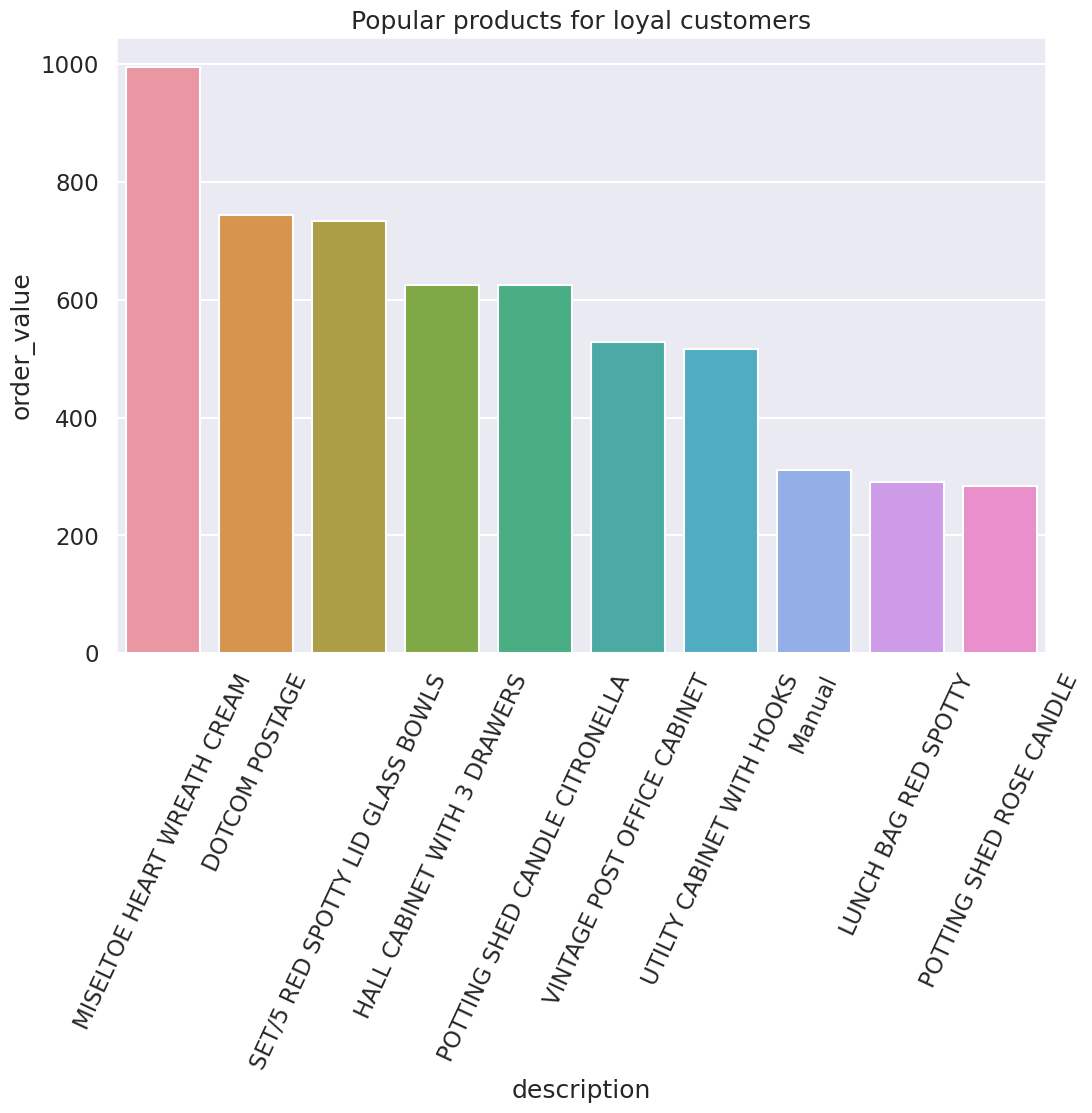

In [931]:
#popular products plot for loyal customers
plt.figure(figsize=(12,8))
sns.barplot(data=lc_products, x='description', y='order_value')
plt.title('Popular products for loyal customers')
plt.xticks(rotation=65)
plt.show()

    top 10 popular produts for loyal customers, wreath is the big one, wreaths are releated to christmas sales.

#### price category

In [934]:
#price category preference for loyal customers
lc_category = top_sum(loyal_customers, 'price_category', 'order_value')

In [935]:
#adding percentage column
lc_category['percentage'] = percentage_calculation(lc_category['order_value'], lc_category['order_value'].sum()).round(2)
lc_category

price_category  order_value  percentage
1           cheap   6086839.88       97.68
2       expensive     76583.25        1.23
5  very expensive     23215.50        0.37
4        low-cost     22650.83        0.36
3       high-cost     13133.36        0.21
0      affordable      9251.63        0.15

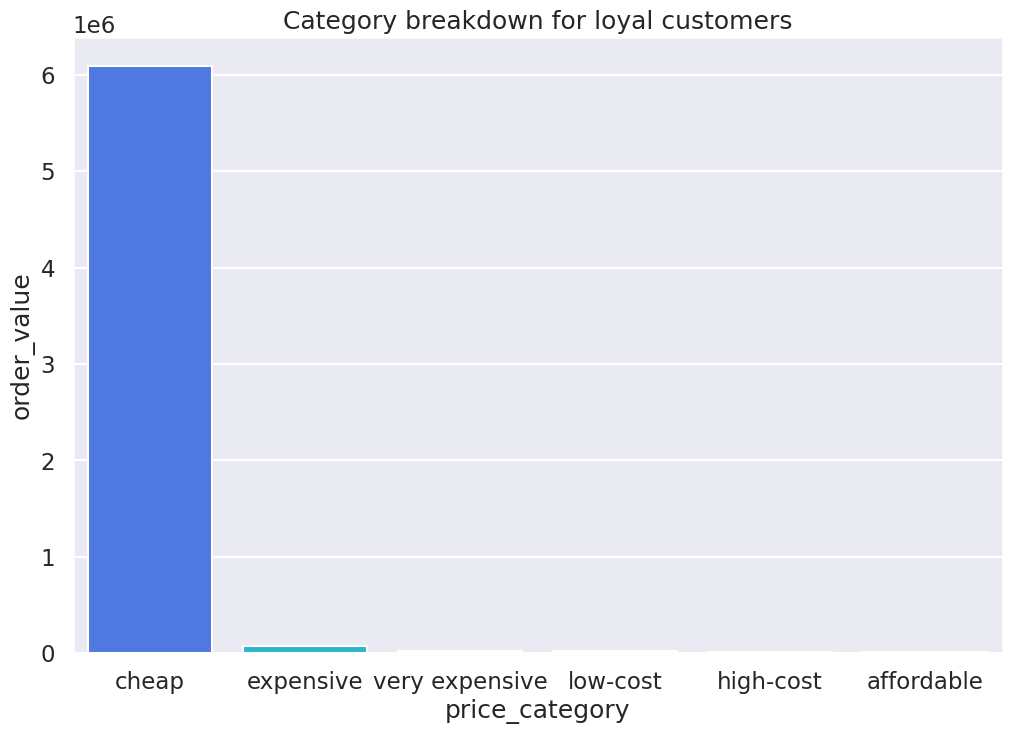

In [936]:
#category preference plot for loyal customers
plt.figure(figsize=(12,8))
sns.barplot(data=lc_category, x='price_category', y='order_value')
plt.title('Category breakdown for loyal customers')
plt.show()

    cheap makes the vast majority order for loyal customers, a slight less equal distribuiton for the other categories. Expensive is the second preference with 1%

#### average order value

In [939]:
#average order value per month for loyal customers
lc_month = top_mean(loyal_customers, 'month_year', 'order_value', top_n=14)
lc_month.sort_values(by='month_year', inplace=True)
lc_month

month_year  order_value
0     2018-11        25.76
1     2018-12        22.27
2     2019-01        21.72
3     2019-02        22.83
4     2019-03        21.95
5     2019-04        18.46
6     2019-05        24.62
7     2019-06        21.99
8     2019-07        21.13
9     2019-08        25.27
10    2019-09        23.25
11    2019-10        22.91
12    2019-11        18.21
13    2019-12        18.81

In [940]:
#average order value for loyal customers
mean_lc_value = lc_month['order_value'].mean()
mean_lc_value

22.084285714285716

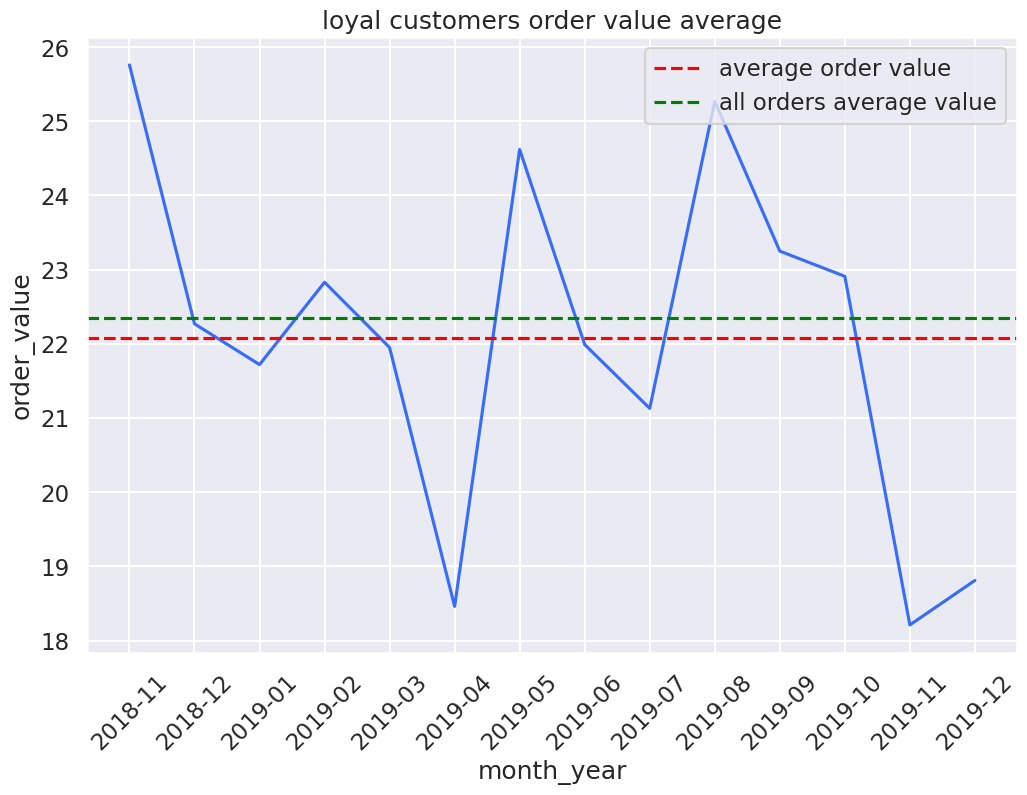

In [941]:
#order value average plot for loyal customers
plt.figure(figsize=(12,8))
sns.lineplot(data=lc_month, x='month_year', y='order_value')
plt.axhline(y=mean_lc_value, color='r', linestyle='--', label='average order value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('loyal customers order value average')
plt.legend()
plt.show()

    The usual drop seen in all previsous data analysed from november/2018 to december/2018. The average for this segment is slightly lower when compared with all orders average. A massive drop in order value in april/2019. It bounced back on the following month. Remained close to the average until a spike in august/2019. After that, sales only dropped, up to december/2019 but the recovery did not bounced close to its average.

#### average basket size

In [944]:
#average basket size per month for loyal customers
lc_quantity = top_mean(loyal_customers, 'month_year', 'quantity', top_n=14)
lc_quantity.sort_values(by='month_year', inplace=True)
lc_quantity


month_year  quantity
0     2018-11     18.26
1     2018-12     11.64
2     2019-01     12.23
3     2019-02     12.95
4     2019-03     12.69
5     2019-04     11.05
6     2019-05     12.79
7     2019-06     12.96
8     2019-07     12.55
9     2019-08     15.05
10    2019-09     12.25
11    2019-10     12.46
12    2019-11     10.10
13    2019-12     10.97

In [945]:
#average basket size for best customers
lc_avg_basket = lc_quantity['quantity'].mean()
lc_avg_basket

12.710714285714285

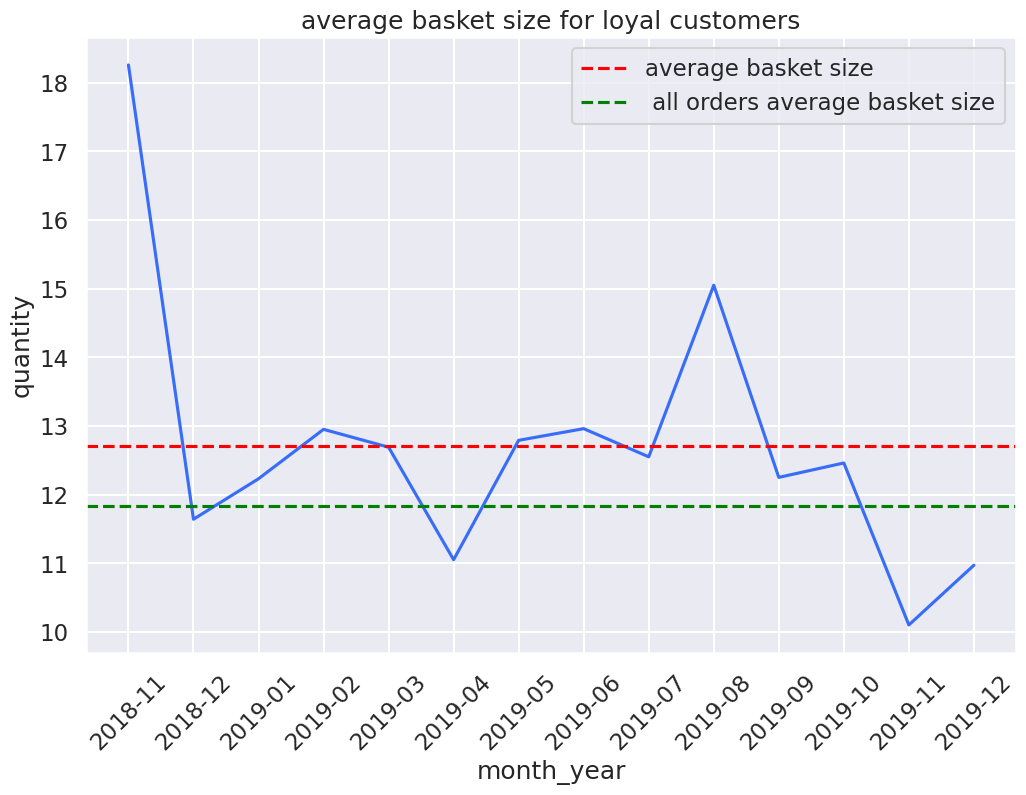

In [946]:
#quantity average for loyal customer plot
plt.figure(figsize=(12,8))
sns.lineplot(data=lc_quantity, x='month_year', y='quantity')
plt.axhline(y=lc_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label=' all orders average basket size')
plt.title('average basket size for loyal customers')
plt.legend()
plt.xticks(rotation=45)
plt.show()

    average basket size of loyal customers is above all orders average. Ups and downs along the 2019 year. A spike in august/2019 matching the previous average order value for this segment. After that, it dropped to its lowest level in november/2019.

### big spenders

In [949]:
bs = rfm_seg.query('M_quartile == 4').reset_index()
bs.head()

customer_id  recency  frequency   monetary  R_quartile  F_quartile  \
0      12346.0      325          2  154367.20           1           1   
1      12347.0        2        179    4256.90           4           4   
2      12348.0       75         31    1797.24           2           2   
3      12349.0       18         73    1757.55           3           3   
4      12352.0       36         95    3466.67           3           3   

   M_quartile RFM_score  
0           4       114  
1           4       444  
2           4       224  
3           4       334  
4           4       334

In [950]:
#big spenders customer id
bs_id = bs['customer_id'].tolist()

In [951]:
#querying big spenders from main Data Frame
big_spenders = ecom.query('customer_id == @bs_id')
big_spenders.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

#### products

In [953]:
#top mean order value products for big spenders
bs_description = top_mean(big_spenders, 'description', 'order_value')

In [954]:
#adding percentage column
bs_description['percentage'] = percentage_calculation(bs_description['order_value'], bs_description['order_value'].sum()).round(2)
bs_description

description  order_value  percentage
2152       PAPER CRAFT , LITTLE BIRDIE    168469.60       85.57
2224    PICNIC BASKET WICKER 60 PIECES     19809.75       10.06
3184              TEA TIME TEA TOWELS       3022.50        1.54
1849    MEDIUM CERAMIC TOP STORAGE JAR      1121.36        0.57
1934       MISELTOE HEART WREATH CREAM       996.00        0.51
1421       HALL CABINET WITH 3 DRAWERS       817.86        0.42
959                     DOTCOM POSTAGE       744.15        0.38
2904  SET/5 RED SPOTTY LID GLASS BOWLS       734.40        0.37
2422    POTTING SHED CANDLE CITRONELLA       625.41        0.32
3422  WEEKEND BAG VINTAGE ROSE PAISLEY       527.85        0.27

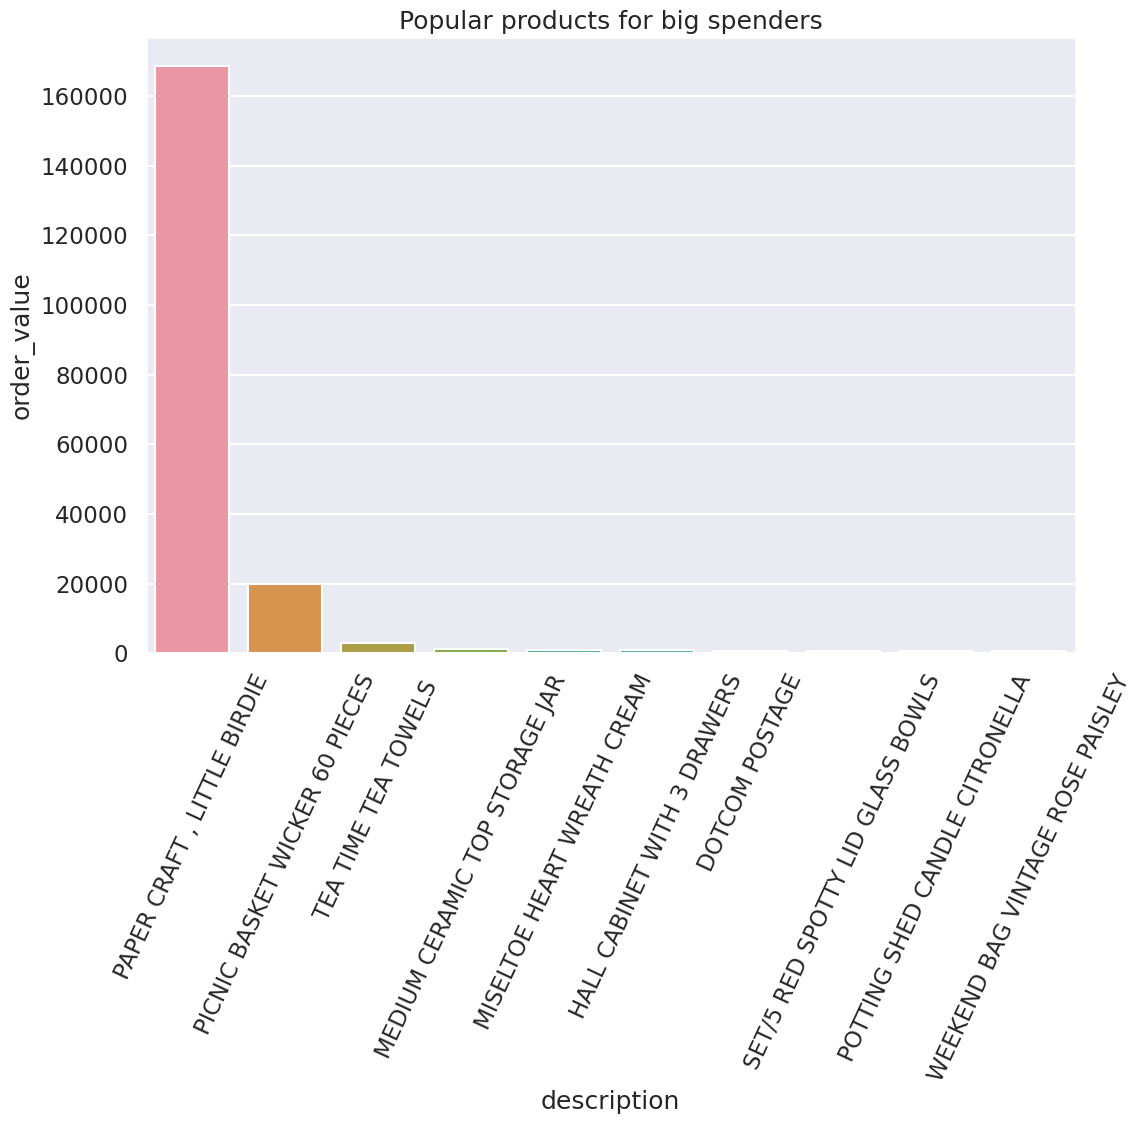

In [955]:
#popular products plot for big spenders
plt.figure(figsize=(12,8))
sns.barplot(data=bs_description, x='description', y='order_value')
plt.title('Popular products for big spenders')
plt.xticks(rotation=65)
plt.show()

    papper craft is the most popular product within the big spenders at almost 86%, picnic basket wicker comes in second with 10%. Other top 10 items didn't get even close to the volume of the first two ones.

#### price category

In [958]:
#price category preference for big spenders
bs_category = top_sum(big_spenders, 'price_category', 'order_value')

In [959]:
#adding percentage column
bs_category['percentage'] = percentage_calculation(bs_category['order_value'], bs_category['order_value'].sum()).round(2)
bs_category

price_category  order_value  percentage
1           cheap   7277656.52       96.69
2       expensive     86639.70        1.15
5  very expensive     62185.50        0.83
3       high-cost     60532.16        0.80
4        low-cost     25537.05        0.34
0      affordable     14117.49        0.19

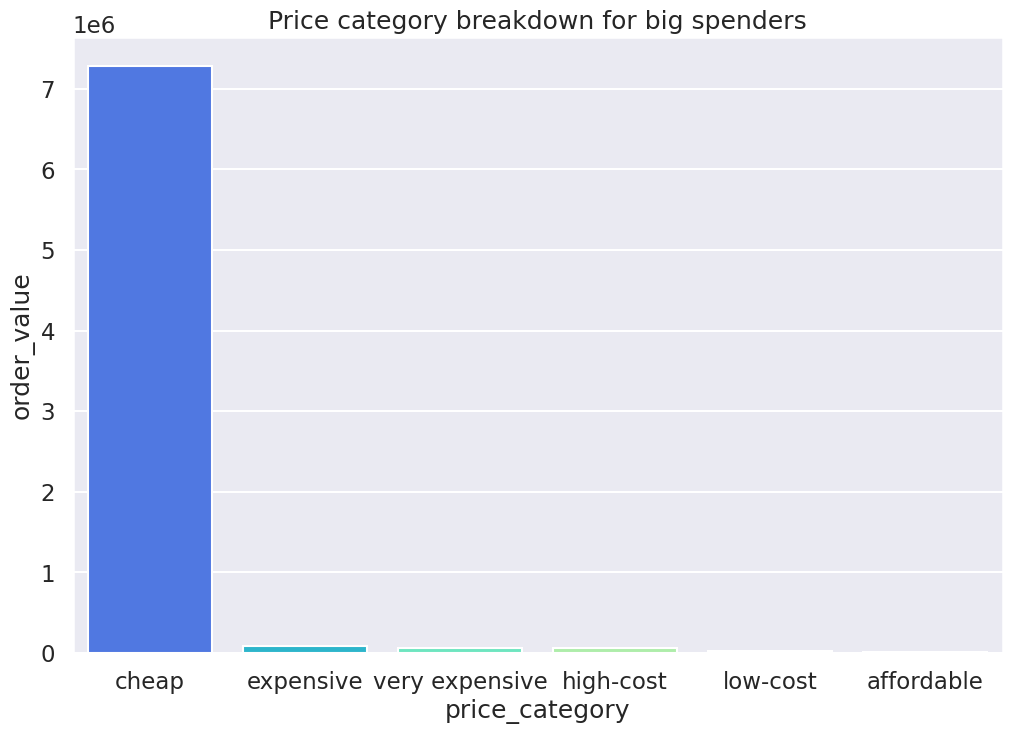

In [960]:
#category price preference plot for big spenders
plt.figure(figsize=(12,8))
sns.barplot(data=bs_category, x='price_category', y='order_value')
plt.title('Price category breakdown for big spenders')
plt.show()

    preference for cheap items stands out, expensive items would come second, followed by very expensive items.

#### average order value

In [963]:
#average order value per month for big spenders
bs_month = top_mean(big_spenders, 'month_year', 'order_value', top_n=14)
bs_month.sort_values(by='month_year', inplace=True)
bs_month

month_year  order_value
0     2018-11        34.51
1     2018-12        27.42
2     2019-01        36.43
3     2019-02        26.96
4     2019-03        25.73
5     2019-04        26.57
6     2019-05        28.58
7     2019-06        31.68
8     2019-07        26.93
9     2019-08        29.29
10    2019-09        27.97
11    2019-10        28.62
12    2019-11        23.64
13    2019-12        66.46

In [964]:
#average order value for big spenders
mean_bs_value = bs_month['order_value'].mean()
mean_bs_value

31.485000000000003

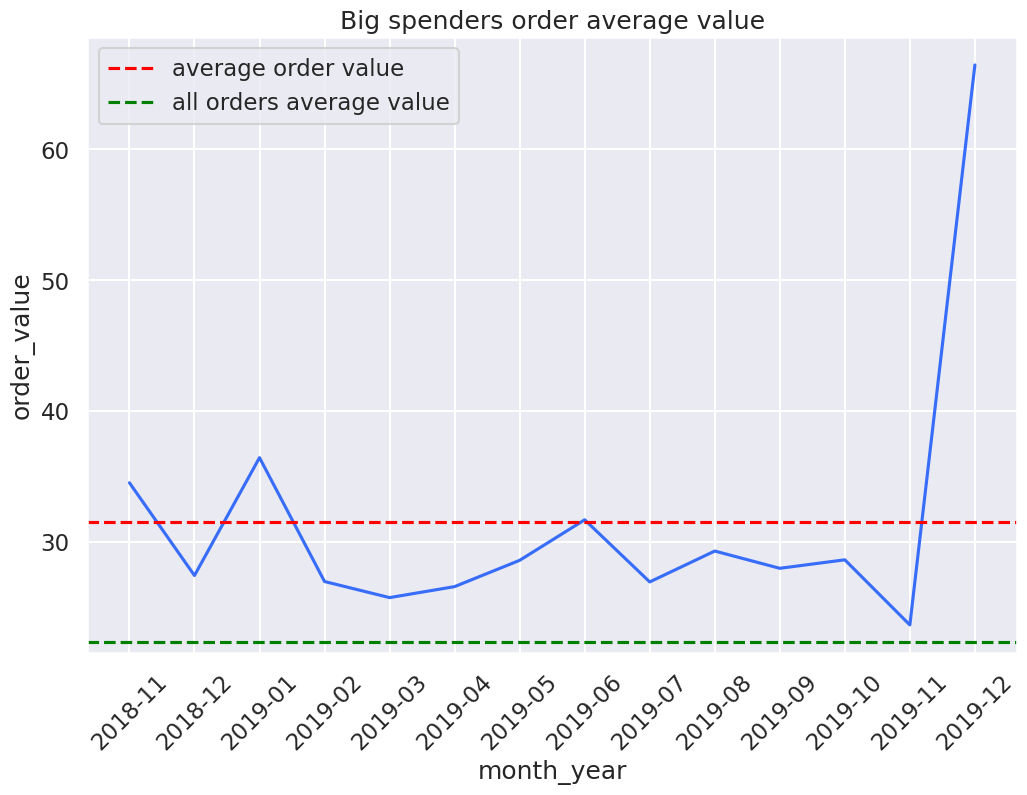

In [965]:
#order average value plot for big spenders
plt.figure(figsize=(12,8))
sns.lineplot(data=bs_month, x='month_year', y='order_value')
plt.axhline(y=mean_bs_value, color='r', linestyle='--', label='average order value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('Big spenders order average value')
plt.legend()
plt.show()

    This segment has an average order value higher when comapred with all orders average. The monthly average remained in between those averages throughout the year and a massive spike seen in december/2019.

#### average basket size

In [968]:
#average basket size per month for big spenders
bs_quantity = top_mean(big_spenders, 'month_year', 'quantity', top_n=14)
bs_quantity.sort_values(by='month_year', inplace=True)
bs_quantity

month_year  quantity
0     2018-11     26.21
1     2018-12     14.47
2     2019-01     24.01
3     2019-02     15.68
4     2019-03     15.46
5     2019-04     15.90
6     2019-05     15.05
7     2019-06     15.72
8     2019-07     15.61
9     2019-08     17.71
10    2019-09     15.08
11    2019-10     15.59
12    2019-11     13.04
13    2019-12     34.35

In [969]:
#average basket size for big spenders
bs_avg_basket = bs_quantity['quantity'].mean()
bs_avg_basket

18.134285714285717

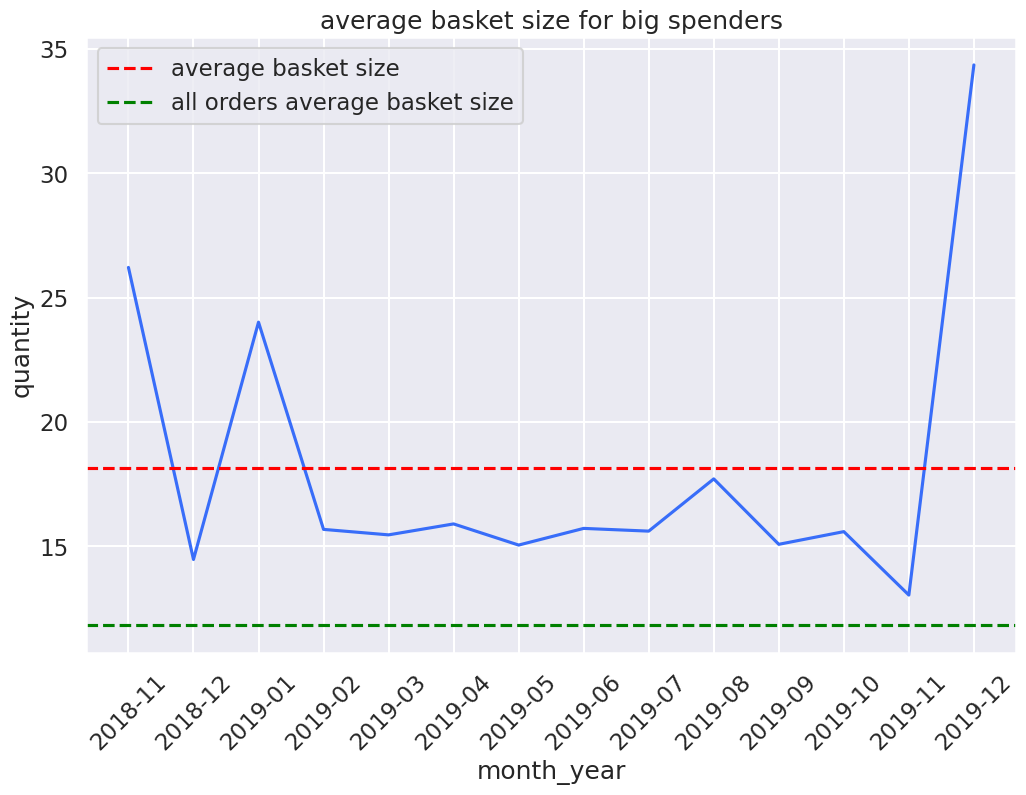

In [970]:
#quantity average for big spenders plot
plt.figure(figsize=(12,8))
sns.lineplot(data=bs_quantity, x='month_year', y='quantity')
plt.axhline(y=bs_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='all orders average basket size')
plt.title('average basket size for big spenders')
plt.legend()
plt.xticks(rotation=45)
plt.show()

    matching the previous order average analysis, monthly average of basket size remained in between both averages throughout the year. Let alone a spike in january/2019 and december/2019

### almost lost customers

In [973]:
alc = rfm_seg.query('RFM_score == "244"').reset_index()
alc.head()

customer_id  recency  frequency  monetary  R_quartile  F_quartile  \
0      12360.0       52        128   2645.46           2           4   
1      12370.0       51        163   3483.29           2           4   
2      12378.0      129        219   4008.62           2           4   
3      12409.0       78        113  10909.41           2           4   
4      12502.0       95        142   3665.67           2           4   

   M_quartile RFM_score  
0           4       244  
1           4       244  
2           4       244  
3           4       244  
4           4       244

In [974]:
#almost lost customers ids
alc_id = alc['customer_id'].tolist()

In [975]:
#querying almost lost customers from mains Data Frame
almost_lost = ecom.query('customer_id == @alc_id')
almost_lost.head()

invoice_no stock_code                       description  quantity  \
435     536408      22537      MAGIC DRAWING SLATE DINOSAUR        24   
436     536408      22533  MAGIC DRAWING SLATE BAKE A CAKE         24   
437     536408      20982       12 PENCILS TALL TUBE SKULLS        12   
438     536408      21832              CHOCOLATE CALCULATOR        12   
439     536408      21915            RED  HARMONICA IN BOX         12   

           invoice_date  unit_price  customer_id  order_value month_year  \
435 2018-11-29 11:41:00        0.42      14307.0        10.08    2018-11   
436 2018-11-29 11:41:00        0.42      14307.0        10.08    2018-11   
437 2018-11-29 11:41:00        0.85      14307.0        10.20    2018-11   
438 2018-11-29 11:41:00        1.65      14307.0        19.80    2018-11   
439 2018-11-29 11:41:00        1.25      14307.0        15.00    2018-11   

           date  year  day price_category  
435  2018-11-29  2018    3          cheap  
436  2018-11-29  2018    3          cheap  
437  2018-11-29  2018    3          cheap  
438  2018-11-29  2018    3          cheap  
439  2018-11-29  2018    3          cheap

#### products

In [977]:
#top average products for almost lost customers
alc_product = top_mean(almost_lost, 'description', 'order_value')

In [978]:
#adding percentage column
alc_product['percentage'] = percentage_calculation(alc_product['order_value'], alc_product['order_value'].sum()).round(2)
alc_product

description  order_value  percentage
1316                           Manual       911.23       36.95
1705     REGENCY MIRROR WITH SHUTTERS       290.00       11.76
1844  SET OF 16 VINTAGE BLACK CUTLERY       262.80       10.66
2249      VINTAGE RED KITCHEN CABINET       195.00        7.91
1036         IVORY EMBROIDERED QUILT        178.75        7.25
2219     VINTAGE BLUE KITCHEN CABINET       150.00        6.08
403     CHEST NATURAL WOOD 20 DRAWERS       125.00        5.07
1033         IVORY CAFE HANGING LAMP        124.80        5.06
362                 CARNIVAL BRACELET       114.75        4.65
1584                   POMPOM CURTAIN       114.05        4.62

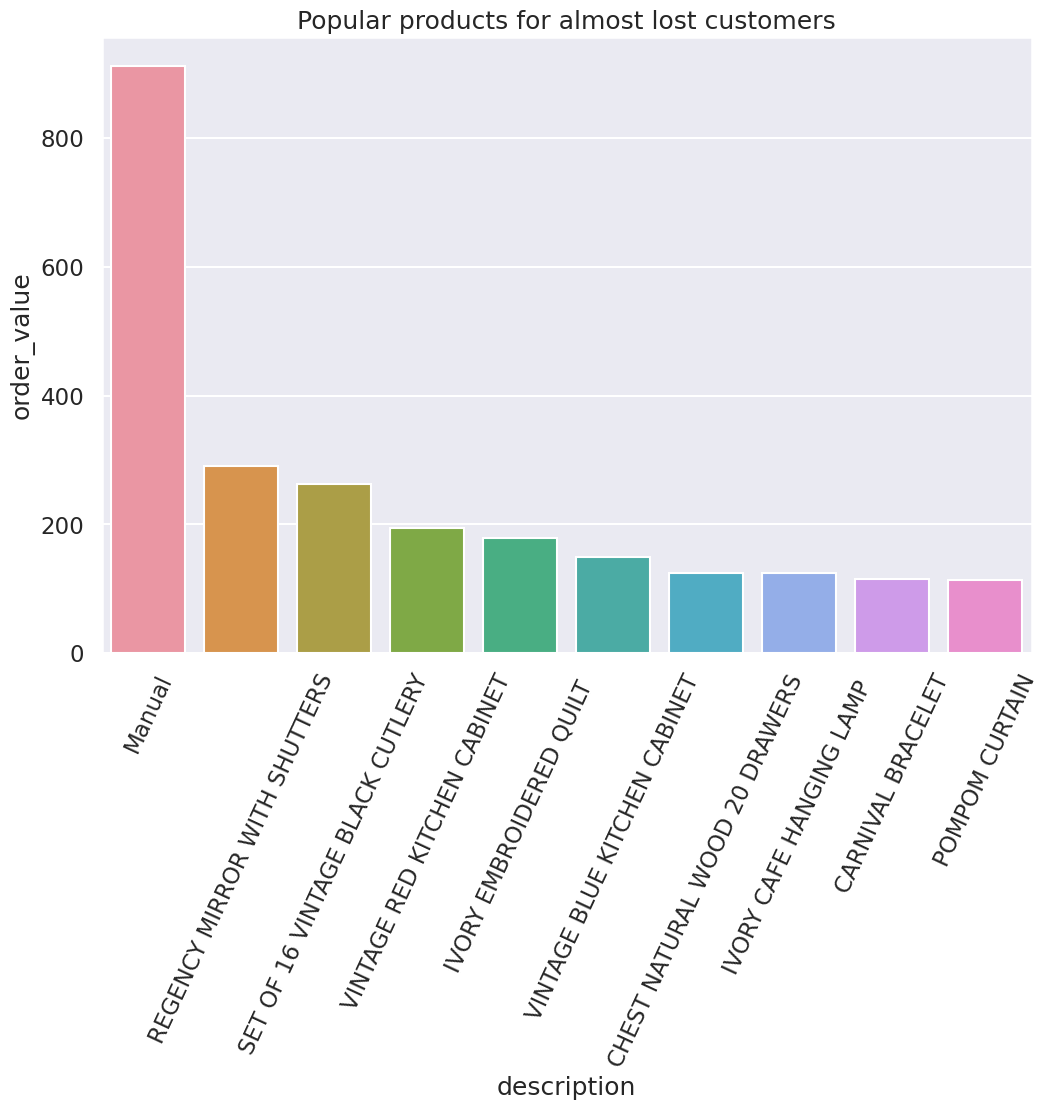

In [979]:
#popular products plot for almost lost customers
plt.figure(figsize=(12,8))
sns.barplot(data=alc_product, x='description', y='order_value')
plt.title('Popular products for almost lost customers')
plt.xticks(rotation=65)
plt.show()

    manual is almost 37% of the top 10 most popular products for this segment.

#### price category

In [982]:
#price category preference for almost lost customers
alc_category = top_sum(almost_lost, 'price_category', 'order_value')

In [983]:
#adding percentage column
alc_category['percentage'] = percentage_calculation(alc_category['order_value'], alc_category['order_value'].sum()).round(2)
alc_category

price_category  order_value  percentage
1          cheap    310741.70       90.99
2      expensive     26014.00        7.62
3       low-cost      2620.15        0.77
0     affordable      2151.36        0.63

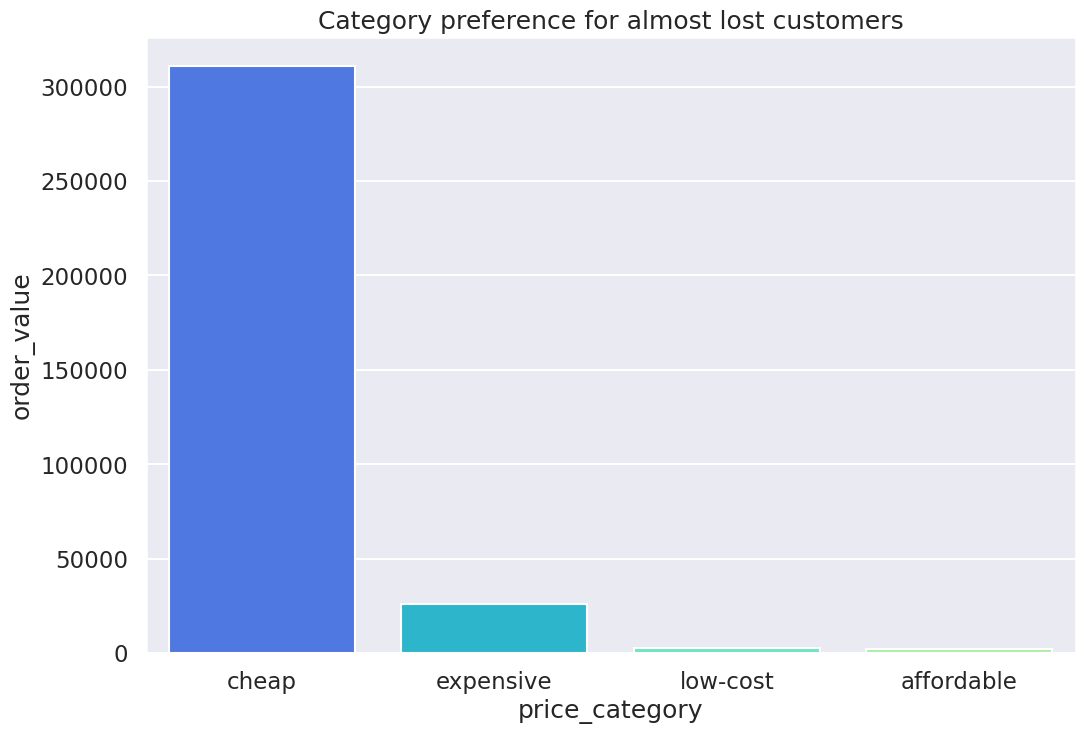

In [984]:
#category preference plot 
plt.figure(figsize=(12,8))
sns.barplot(data=alc_category, x='price_category', y='order_value')
plt.title('Category preference for almost lost customers')
plt.show()

    cheap still the most popular category with almost 91%, but expensive products feature second with 7%.

#### average order value

In [987]:
#average order value per month for almost lost customers
alc_month = top_mean(almost_lost, 'month_year', 'order_value', top_n=16)
alc_month.sort_values(by='month_year', inplace=True)
alc_month

month_year  order_value
0     2018-11        21.91
1     2018-12        15.39
2     2019-01        17.10
3     2019-02        14.70
4     2019-03        17.08
5     2019-04        27.05
6     2019-05        20.34
7     2019-06        21.68
8     2019-07        19.69
9     2019-08        21.35
10    2019-09        19.91
11    2019-10        22.63

In [988]:
#average order value for almost lost customers
mean_alc_value = alc_month['order_value'].mean()
mean_alc_value

19.9025

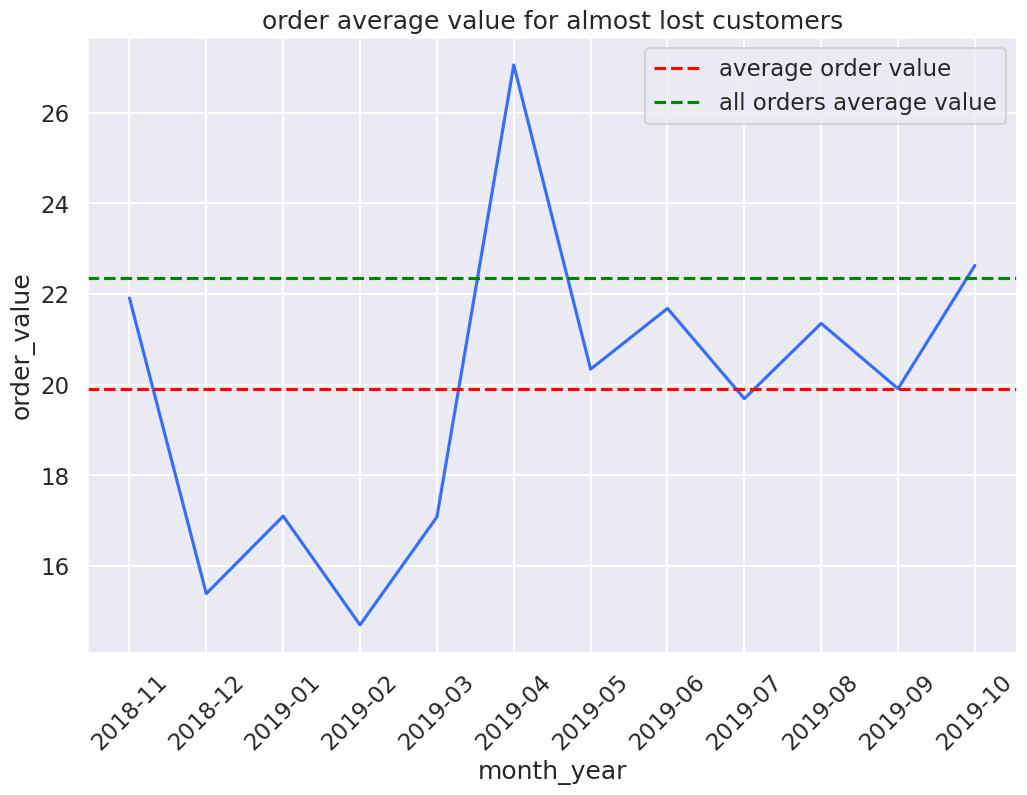

In [989]:
#order average value for almost lost customers
plt.figure(figsize=(12,8))
sns.lineplot(data=alc_month, x='month_year', y='order_value')
plt.axhline(y=mean_alc_value, color='r', linestyle='--', label='average order value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('order average value for almost lost customers')
plt.legend()
plt.show()

     for this segment its order value average starts under all order values and goes under for 4 months before its peak in april/2019, after that remained in between averages.

#### average basket size

In [992]:
#average basket size per month for almost lost customers
alc_quantity = top_mean(almost_lost, 'month_year', 'quantity', top_n=14)
alc_quantity.sort_values(by='month_year', inplace=True)
alc_quantity

month_year  quantity
0     2018-11     13.35
1     2018-12      8.68
2     2019-01      9.15
3     2019-02      8.75
4     2019-03      9.30
5     2019-04      9.62
6     2019-05     10.62
7     2019-06     11.81
8     2019-07     11.49
9     2019-08     11.55
10    2019-09     11.75
11    2019-10     11.37

In [993]:
#average basket size for almost lost customers
alc_avg_basket = alc_quantity['quantity'].mean()
alc_avg_basket

10.62

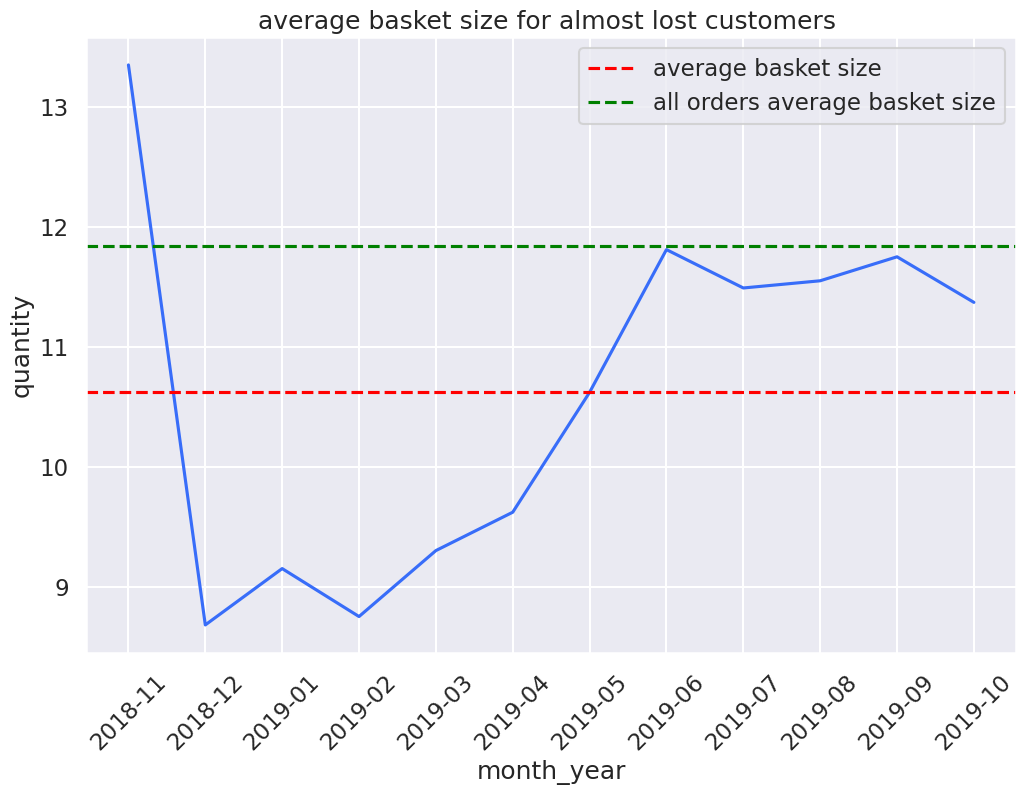

In [994]:
#quantity average for almost lost customer plot
plt.figure(figsize=(12,8))
sns.lineplot(data=alc_quantity, x='month_year', y='quantity')
plt.axhline(y=alc_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='all orders average basket size')
plt.title('average basket size for almost lost customers ')
plt.legend()
plt.xticks(rotation=45)
plt.show()

     matching previous average order value analysis, dropped unders the averages for four months after november/2018. We don't see a peak in april as seen on previous graph. but it recovered above its average in may/2019. and stayed between averages for the rest of the year.

### lost customers

In [997]:
lc = rfm_seg.query('RFM_score == "144"').reset_index()
lc.head()

customer_id  recency  frequency  monetary  R_quartile  F_quartile  \
0      12383.0      184        100   1861.81           1           4   
1      12501.0      315        159   2226.60           1           4   
2      12669.0      150        101   3870.13           1           4   
3      12840.0      143        116   2739.27           1           4   
4      12947.0      143        103   1800.69           1           4   

   M_quartile RFM_score  
0           4       144  
1           4       144  
2           4       144  
3           4       144  
4           4       144

In [998]:
#lost customers id
lc_id = lc['customer_id'].tolist()

In [999]:
#querying lost customers from main Data Frame
lost_customers = ecom.query('customer_id == @lc_id')
lost_customers.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  order_value month_year  \
0 2018-11-29 08:26:00        2.55      17850.0        15.30    2018-11   
1 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
2 2018-11-29 08:26:00        2.75      17850.0        22.00    2018-11   
3 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   
4 2018-11-29 08:26:00        3.39      17850.0        20.34    2018-11   

         date  year  day price_category  
0  2018-11-29  2018    3          cheap  
1  2018-11-29  2018    3          cheap  
2  2018-11-29  2018    3          cheap  
3  2018-11-29  2018    3          cheap  
4  2018-11-29  2018    3          cheap

#### products

In [1001]:
#top average products for lost customers
lc_product = top_mean(lost_customers, 'description', 'order_value')

In [1002]:
#adding percentage column
lc_product['percentage'] = percentage_calculation(lc_product['order_value'], lc_product['order_value'].sum()).round(2)
lc_product

description  order_value  percentage
751                                Manual       568.61       30.87
1295          VINTAGE RED KITCHEN CABINET       270.17       14.67
258           CIRCUS PARADE BABY GIFT SET       179.40        9.74
400            FAMILY PHOTO FRAME CORNICE       145.95        7.92
826       PAPER CHAIN KIT 50'S CHRISTMAS        128.98        7.00
1042  ROTATING SILVER ANGELS T-LIGHT HLDR       122.40        6.64
926                               POSTAGE       121.88        6.62
1058               SCHOOL DESK AND CHAIR        108.33        5.88
321              DOLLY GIRL BABY GIFT SET        98.17        5.33
2                  SPACEBOY BABY GIFT SET        98.17        5.33

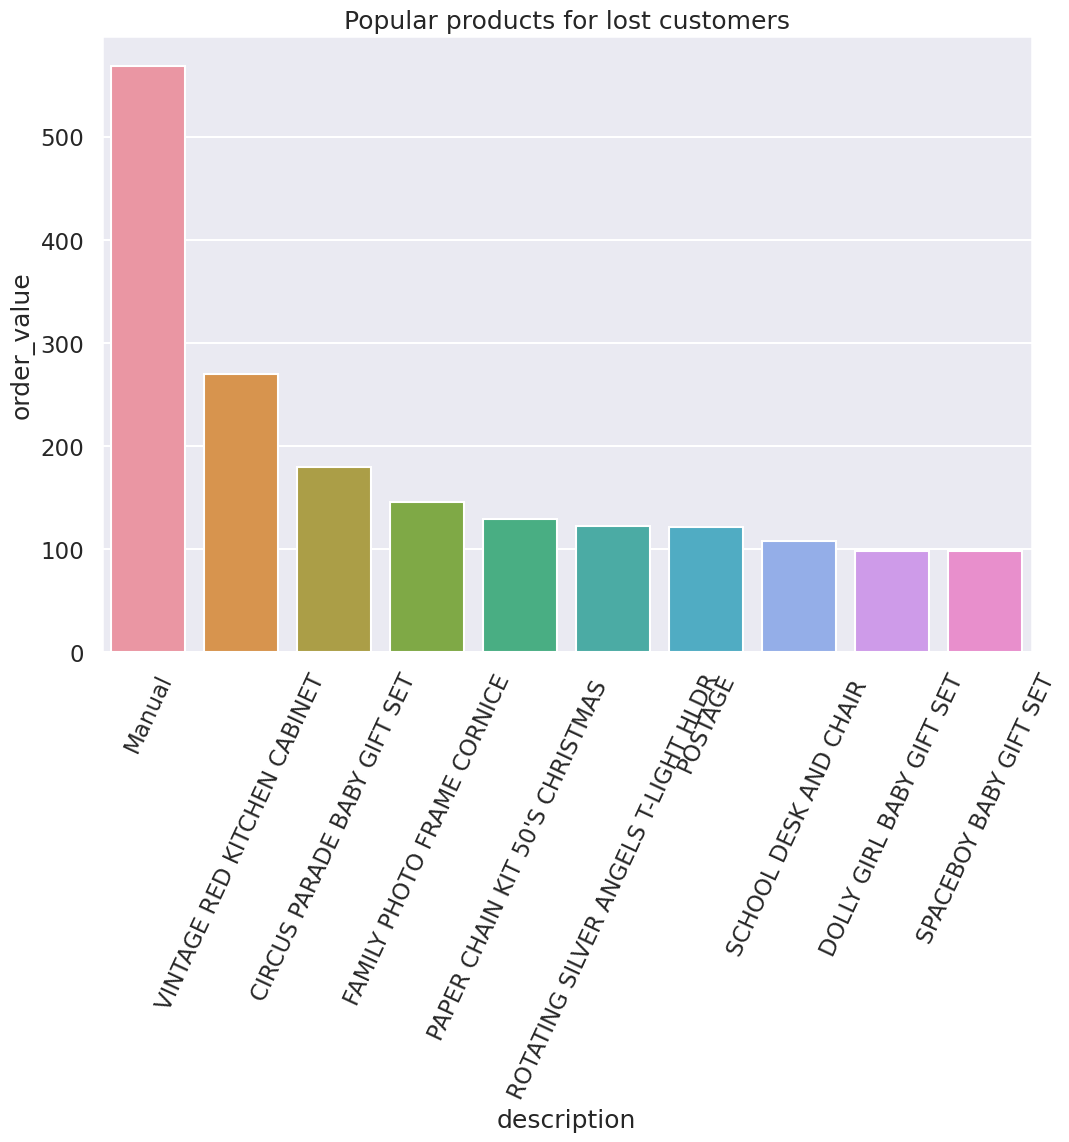

In [1003]:
#popular products plot for lost customers
plt.figure(figsize=(12,8))
sns.barplot(data=lc_product, x='description', y='order_value')
plt.title('Popular products for lost customers')
plt.xticks(rotation=65)
plt.show()

    Manual is the most popular product with almost 31%. 

#### price category

In [1006]:
#category preference for lost customers
lc_category = top_sum(lost_customers, 'price_category', 'order_value')

In [1007]:
#adding percentage column
lc_category['percentage'] = percentage_calculation(lc_category['order_value'], lc_category['order_value'].sum())
lc_category

price_category  order_value  percentage
1          cheap     68677.98   94.549556
2      expensive      2272.60    3.128708
4       low-cost       575.00    0.791607
0     affordable       560.50    0.771645
3      high-cost       550.94    0.758484

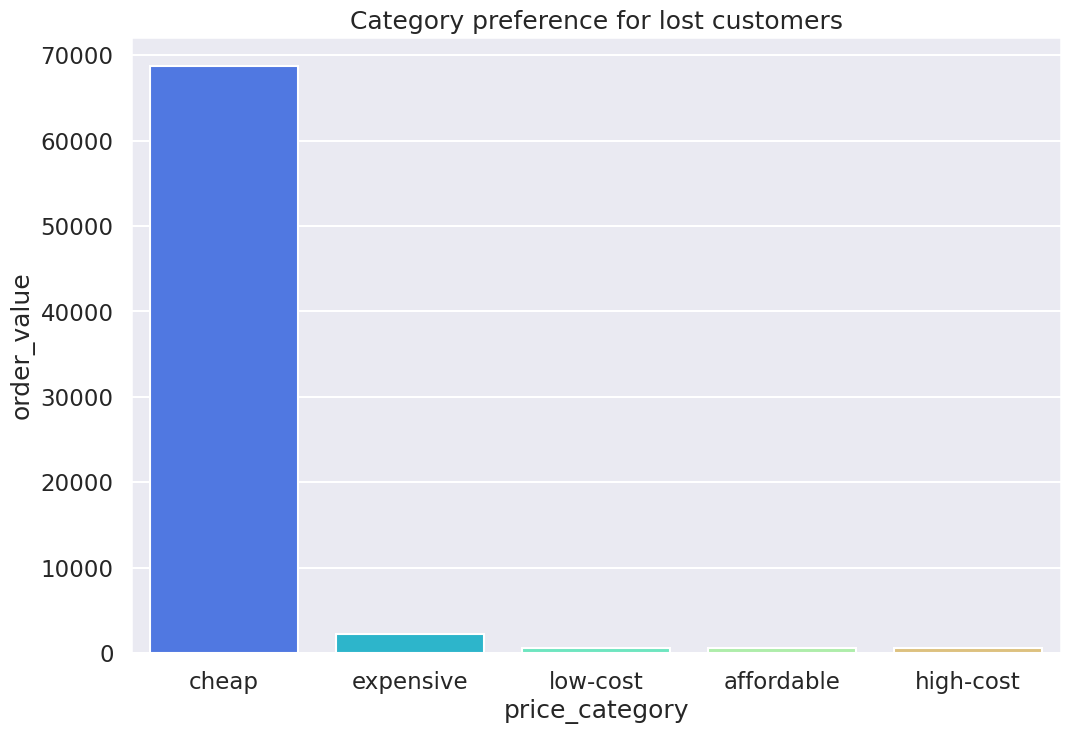

In [1008]:
#category preference plot for lost customers
plt.figure(figsize=(12,8))
sns.barplot(data=lc_category, x='price_category', y='order_value')
plt.title('Category preference for lost customers')
plt.show()

    cheap is still preference of lost customers, expensive and low cost are following.

#### average order value

In [1011]:
#average order value per month for lost customers
lc_month = top_mean(lost_customers, 'month_year', 'order_value', top_n=14)
lc_month.sort_values(by='month_year', inplace=True)
lc_month

month_year  order_value
0    2018-11        17.35
1    2018-12        24.88
2    2019-01        14.98
3    2019-02        14.46
4    2019-03        17.62
5    2019-04        16.44
6    2019-05        15.75
7    2019-06        15.78
8    2019-07        18.57

In [1012]:
#average order value for lost customers
mean_lc_value = lc_month['order_value'].mean()
mean_lc_value

17.314444444444444

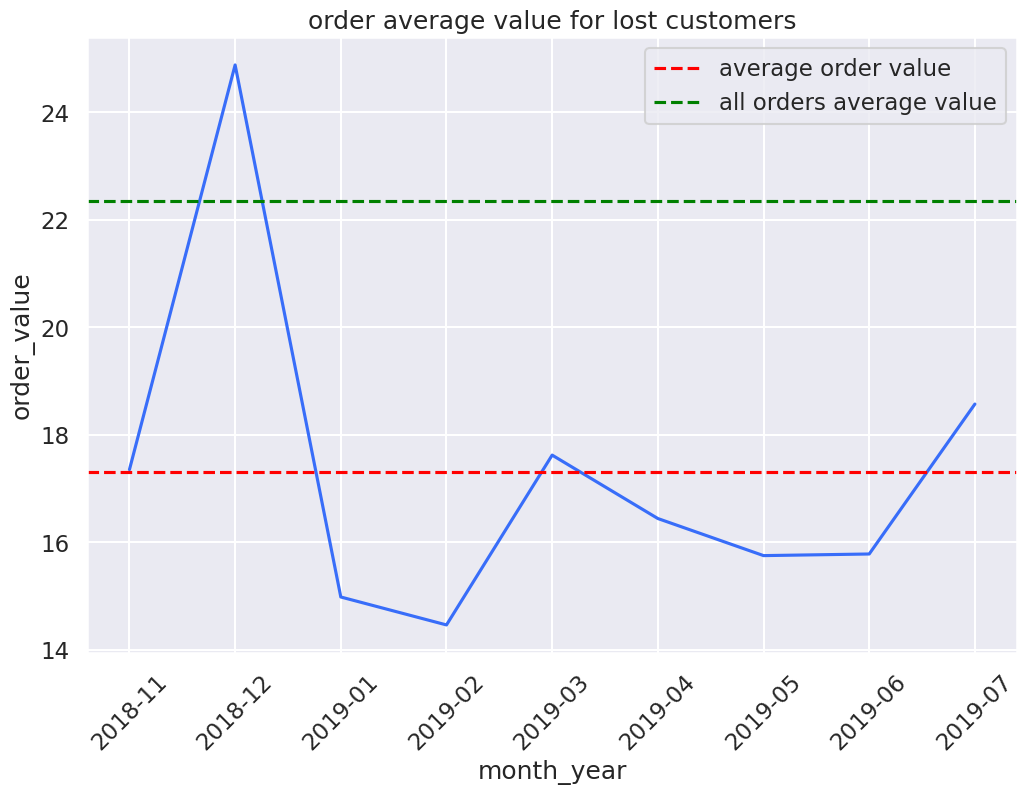

In [1013]:
#order average value plot for lost customers
plt.figure(figsize=(12,8))
sns.lineplot(data=lc_month, x='month_year', y='order_value')
plt.axhline(y=mean_lc_value, color='r', linestyle='--', label='average order value')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('order average value for lost customers')
plt.legend()
plt.show()

    this segment show peak in december/2018, a deep drop and only two months above average after that.

#### average basket size

In [1016]:
#average basket size per month for lost customers
lc_quantity = top_mean(lost_customers, 'month_year', 'quantity', top_n=14)
lc_quantity.sort_values(by='month_year', inplace=True)
lc_quantity

month_year  quantity
0    2018-11      5.80
1    2018-12     11.92
2    2019-01      9.42
3    2019-02      7.18
4    2019-03      8.11
5    2019-04      7.45
6    2019-05      7.41
7    2019-06      9.69
8    2019-07     10.50

In [1017]:
#average basket size for lost customers
lc_avg_basket = lc_quantity['quantity'].mean()
lc_avg_basket

8.608888888888888

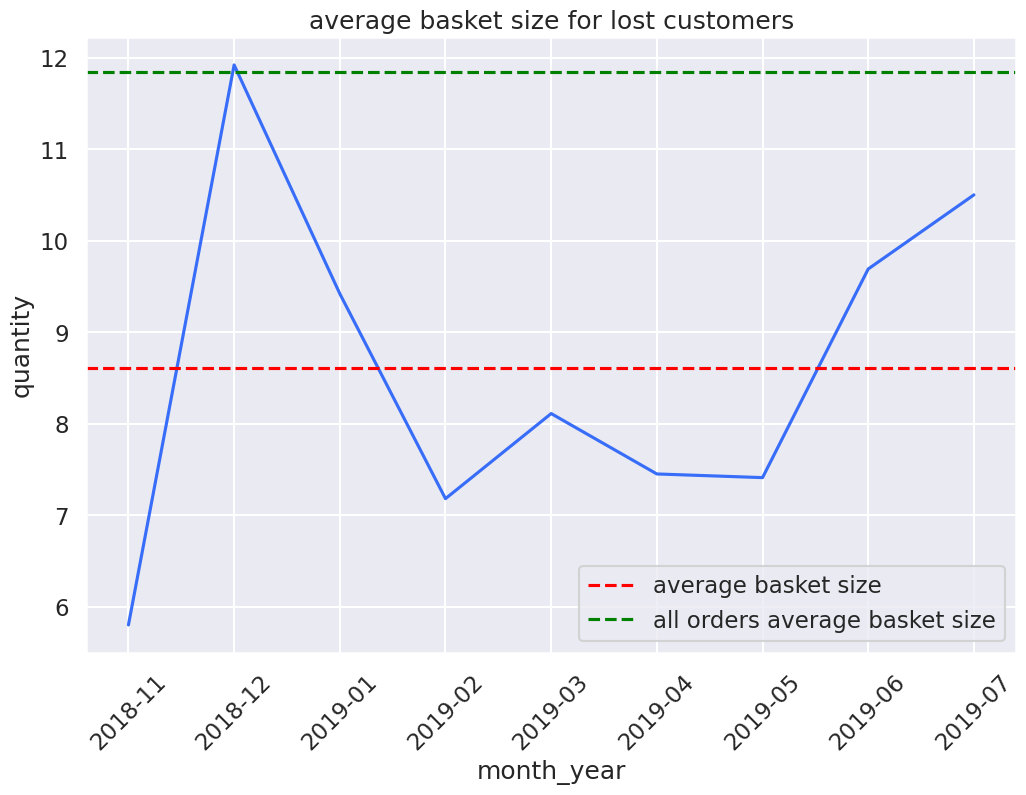

In [1018]:
#quantity average for lost customer plot
plt.figure(figsize=(12,8))
sns.lineplot(data=lc_quantity, x='month_year', y='quantity')
plt.axhline(y=lc_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='all orders average basket size')
plt.title('average basket size for lost customers')
plt.legend()
plt.xticks(rotation=45)
plt.show()

    peaking on december/2018 average only bounced above its total average in june/2019.

### lost cheap customers

In [1021]:
lcc = rfm_seg.query('RFM_score == "111"').reset_index()
lcc.head()

customer_id  recency  frequency  monetary  R_quartile  F_quartile  \
0      12353.0      204          4     89.00           1           1   
1      12361.0      287         10    189.90           1           1   
2      12401.0      303          5     84.30           1           1   
3      12402.0      323         11    225.60           1           1   
4      12441.0      366         11    173.55           1           1   

   M_quartile RFM_score  
0           1       111  
1           1       111  
2           1       111  
3           1       111  
4           1       111

In [1022]:
#lost cheap customers ids
lcc_id = lcc['customer_id'].tolist()

In [1023]:
#querying lost cheap customers from main Data Frame
lost_cheap_customers = ecom.query('customer_id == @lcc_id')
lost_cheap_customers.head()

invoice_no stock_code                         description  quantity  \
252     536393      22180                      RETROSPOT LAMP         8   
385     536403      22867             HAND WARMER BIRD DESIGN        96   
386     536403       POST                             POSTAGE         1   
688     536420      21889              WOODEN BOX OF DOMINOES        12   
689     536420      21892  TRADITIONAL WOODEN CATCH CUP GAME         12   

           invoice_date  unit_price  customer_id  order_value month_year  \
252 2018-11-29 10:37:00        9.95      13747.0         79.6    2018-11   
385 2018-11-29 11:27:00        1.85      12791.0        177.6    2018-11   
386 2018-11-29 11:27:00       15.00      12791.0         15.0    2018-11   
688 2018-11-29 12:03:00        1.25      16583.0         15.0    2018-11   
689 2018-11-29 12:03:00        1.25      16583.0         15.0    2018-11   

           date  year  day price_category  
252  2018-11-29  2018    3          cheap  
385  2018-11-29  2018    3          cheap  
386  2018-11-29  2018    3          cheap  
688  2018-11-29  2018    3          cheap  
689  2018-11-29  2018    3          cheap

#### products

In [1025]:
#popular products for lost cheap customers
lcc_product = top_mean(lost_cheap_customers, 'description', 'order_value')

In [1026]:
#adding percentage column
lcc_product['percentage'] = percentage_calculation(lcc_product['order_value'], lcc_product['order_value'].sum()).round(2)
lcc_product

description  order_value  percentage
633        LOVE SEAT ANTIQUE WHITE METAL       195.00       13.13
1201         VINTAGE RED KITCHEN CABINET       187.50       12.62
966   RUSTIC  SEVENTEEN DRAWER SIDEBOARD       165.00       11.11
572                       JUMBO BAG OWLS       165.00       11.11
52           ANGEL DECORATION 3 BUTTONS        155.52       10.47
40              AFGHAN SLIPPER SOCK PAIR       136.28        9.18
1186        VINTAGE BLUE KITCHEN CABINET       125.00        8.42
201        CHEST NATURAL WOOD 20 DRAWERS       125.00        8.42
930                    REGENCY TEA SPOON       124.80        8.40
203          CHICK GREY HOT WATER BOTTLE       106.20        7.15

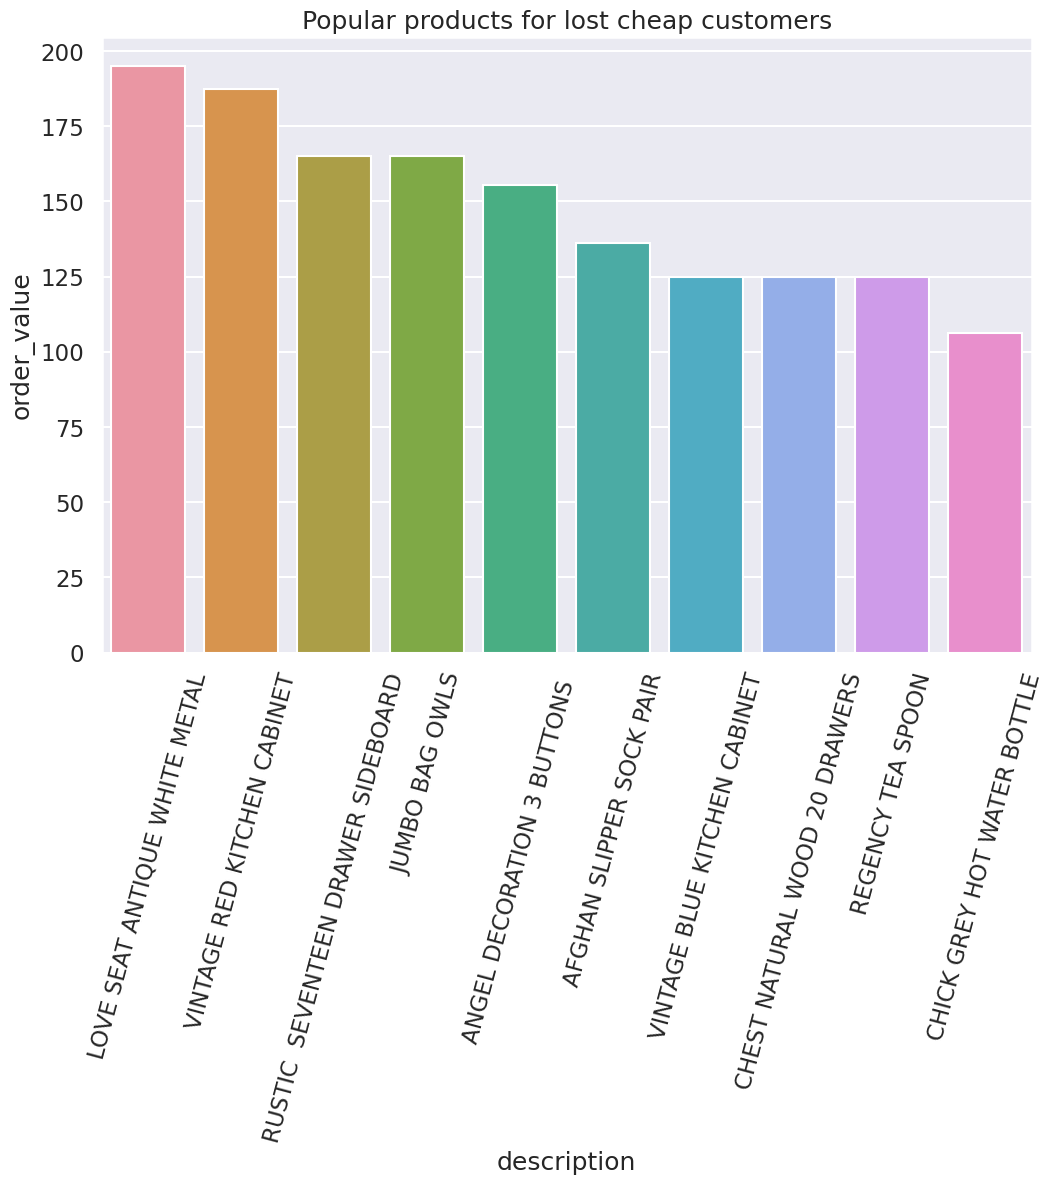

In [1027]:
#popular products plot for lost cheap customers
plt.figure(figsize=(12,8))
sns.barplot(data=lcc_product, x='description', y='order_value')
plt.title('Popular products for lost cheap customers')
plt.xticks(rotation=75)
plt.show()

#### price category

In [1029]:
#category preference for lost cheap customers
lcc_category = top_sum(lost_cheap_customers, 'price_category', 'order_value')

In [1030]:
#adding percentage column
lcc_category['percentage'] = percentage_calculation(lcc_category['order_value'], lcc_category['order_value'].sum()).round(2)
lcc_category

price_category  order_value  percentage
0          cheap     56867.81       97.79
1       low-cost      1283.70        2.21

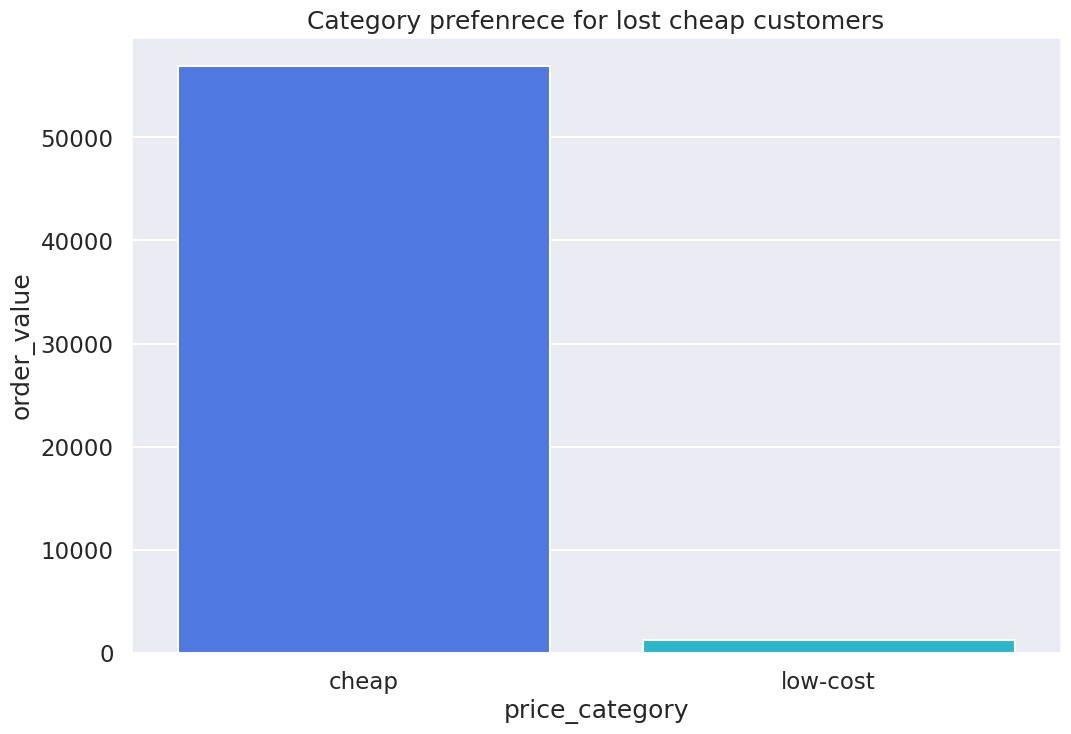

In [1031]:
#category preference plot for lost cheap customers
plt.figure(figsize=(12,8))
sns.barplot(lcc_category, x='price_category', y='order_value')
plt.title('Category prefenrece for lost cheap customers')
plt.show()

    only records of cheap and low cost items for this segment.

#### average order value

In [1034]:
#average order value per month for lost cheap customers
lcc_month = top_mean(lost_cheap_customers, 'month_year', 'order_value', top_n=14)
lcc_month.sort_values('month_year', inplace=True)
lcc_month

month_year  order_value
0    2018-11        20.94
1    2018-12        21.83
2    2019-01        18.83
3    2019-02        18.97
4    2019-03        18.91
5    2019-04        17.40
6    2019-05        20.15
7    2019-06        16.50
8    2019-07        17.97

In [1035]:
#order average value for lost cheap customers
mean_lcc_value = lcc_month['order_value'].mean()
mean_lcc_value

19.055555555555557

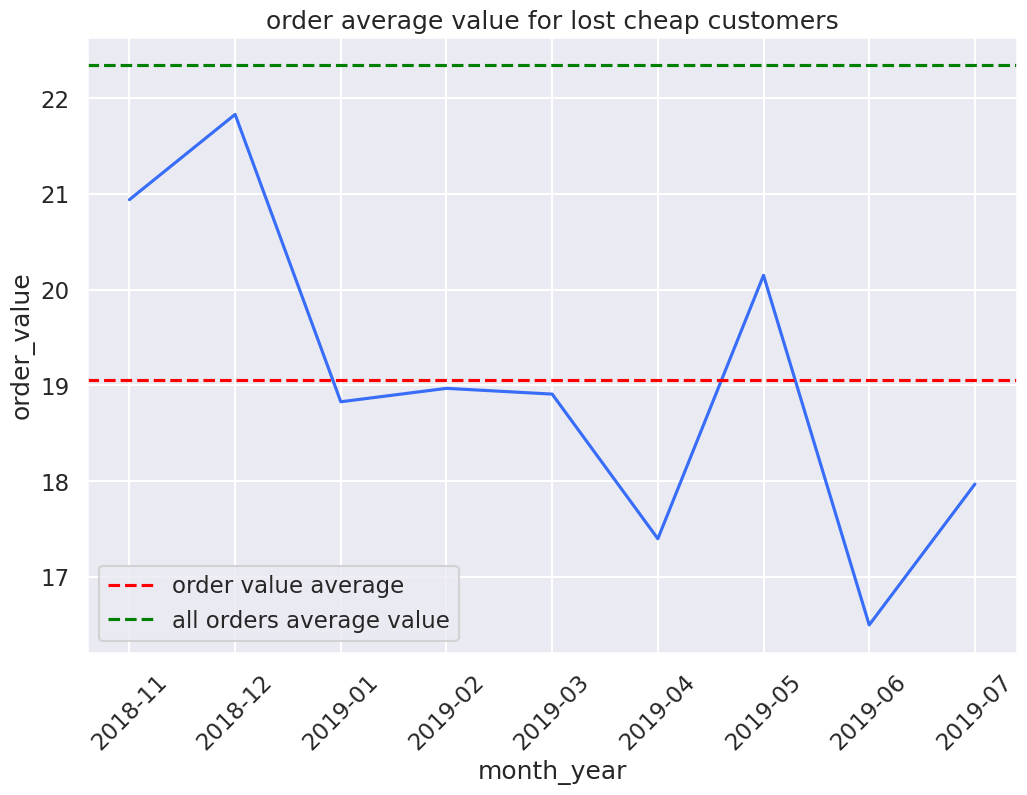

In [1036]:
#order average value for lost cheap customers
plt.figure(figsize=(12,8))
sns.lineplot(data=lcc_month, x='month_year', y='order_value')
plt.axhline(y=mean_lcc_value, color='r', linestyle='--', label='order value average')
plt.axhline(y=mean_order_value, color='g', linestyle='--', label='all orders average value')
plt.xticks(rotation=45)
plt.title('order average value for lost cheap customers')
plt.legend()
plt.show()

    way under all order average, saverage value had its peak in december/2018 and only stayed one month above its average after that may/2019.

#### average basket size

In [1039]:
#average basket size per month for lost cheap customers
lcc_quantity = top_mean(lost_cheap_customers, 'month_year', 'quantity', top_n=14)
lcc_quantity.sort_values(by='month_year', inplace=True)
lcc_quantity

month_year  quantity
0    2018-11      9.66
1    2018-12     12.62
2    2019-01     10.43
3    2019-02     10.69
4    2019-03      9.86
5    2019-04      9.54
6    2019-05     10.32
7    2019-06     10.70
8    2019-07     16.12

In [1040]:
#average basket size for best customers
lcc_avg_basket = lcc_quantity['quantity'].mean()
lcc_avg_basket

11.104444444444445

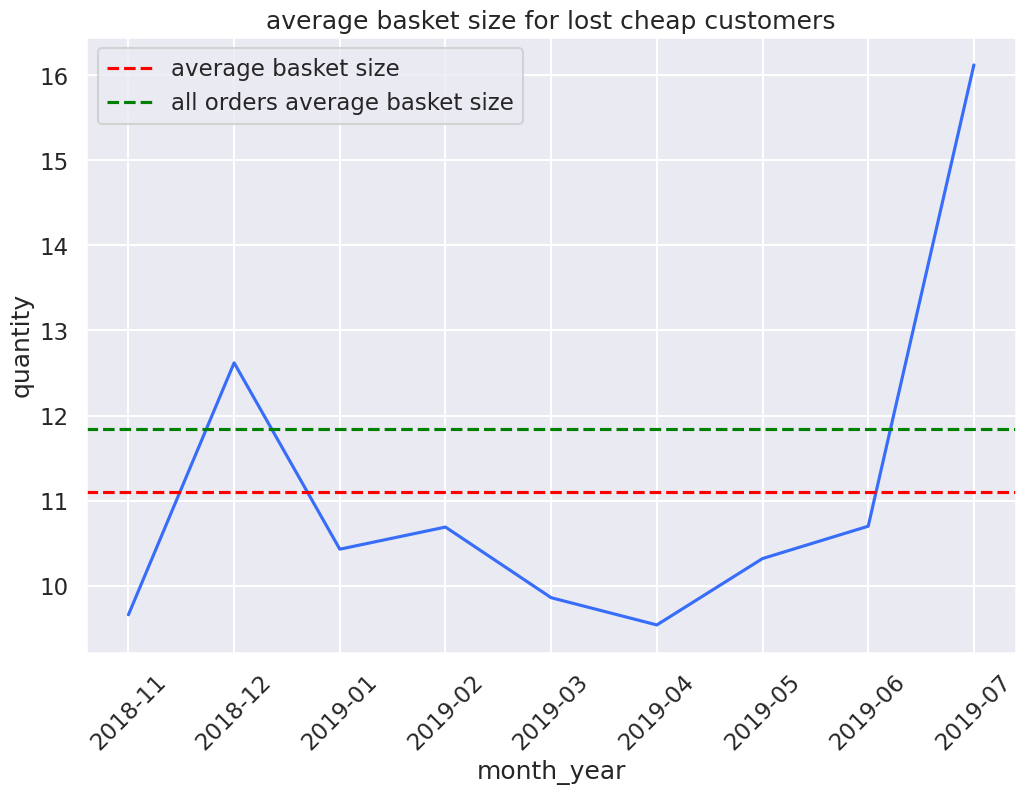

In [1041]:
#quantity average for lost cheap customers plot
plt.figure(figsize=(12,8))
sns.lineplot(data=lcc_quantity, x='month_year', y='quantity')
plt.axhline(y=lcc_avg_basket, color='r', linestyle='--', label='average basket size')
plt.axhline(y=average_basket_size, color='g', linestyle='--', label='all orders average basket size')
plt.title('average basket size for lost cheap customers')
plt.legend()
plt.xticks(rotation=45)
plt.show()

    average basket size of this segment its closer to all orders average. peaking in july/2019, needs further investigation why we lost them.

# Conclusion

We treated missing values, duplicates and enhanced data creating relevant new columns as part of a pre-processing stage.

**In the general data analysis:**

The company revenue from 29/11/2018 to 07/12/2019 is over 10 billion. The lowest net revenue month was November/2018 with 106,493.41 the highest was December/2019 with 1,567,570.09.

The average order value of all time is  22.34. The lowest was on November/2018 at  18.71 and the highest was December/2019 at 37.77.

The basket size average of all time was 11.83. The lowest was on November/2018 at 8.41 and the highest was on December/209 at 17.83.

The top revenue product was paper craft, little bird with total revenue of $336,939.20 and a volume of 161990 units.

The price categories were set as:

* Cheap anything less or equal to 50
* Low-cost between 51 and 200
* Affordable between 201 and 500
* High-cost between 501 and 1000
* Expensive between 1001 and 5000
* Very expensive anything above 5001

Cheap items with 93% of total sales, followed by very expensive items with 2.5%, expensive with 1.5%, high-cost with 1.1%, low-cost 0.8% and affordable at 0.7%.

**Canceled orders**

Canceled orders were analyzed, DOORMAT BLACK FLOCK was the top product canceled.

88% of the orders canceled were from cheap items.

The average cancel order value highlight was from May/2019 and November/2019

Total canceled orders at 6834 or 1.2% of total orders.

Total revenue lost 135,339.19

* Suggest investigation with supplier of top 10 products, customer satisfaction affect directly customer retention.
* Further investigation between May/2019 and November/2019 to find what problems caused so many items to be canceled.
* Depending on company target for canceled orders 1.2% might be off it.
* +135k of lost revenue is not a small amount. Every lost revenue should be investigated.

**Data discrepancies**

**1. Adjusted bad debt**

3 transactions of 'ADJUSTED BAD DEBT ' were found, all 3 with the same amount within 1 minute difference between them.

The amount was 11062.06

Was this customer refunded 3 times by mistake ?

**2. Manual**

Product described as 'Manual' found during data analysis

Are this 'manual' transactions or it is actually a product ? 

**3. Amazon Fee**

5 transactions in total were found under the 'Amazon Fee description' total of 249,042.68 and one of them using a different stock code from the others.

Further investigation of values and procedures as suggestion.




**Segementation Analysis**
      
A RFM segmentation was chosen to segment customers into 6 categories. Big spenders, loyal customers, best customers, almost lost customers, lost customers and lost cheap customers.

In each different segmentation I analyzed their top 10 products, the price category preference, average order value and basket size, the last two we looked at through time, therefore highlighting their seasonal behaviors.

Some of the highlight findings and suggestions per segment:

**1. Best Customers**
 
Most popular product was HALL CABINET WITH 3 DRAWERS.

Cheap items were the preference between this customers with 98.3%. Followed by expensive items 1%

Average order value were 26.57, highest was November/2018 at 36.11 and lowest was April/2019 at 21.07

Average basket size was 15, highest was November/2018 at 30 and lowest was November/2019 at 11

* Best customers were at the highest in November/2018, why the sales are not as high for 2019 data ? 
* Marketing and sales department should work close with this customers to create promotions, offer products, exclusive access to new launches to increase sales opportunity on seasonal period.

**2. Loyal customers**

Most popular product was MISELTOE HEART WREATH CREAM.

Cheap items were the preference between this customers with 97.68%. Followed by expensive items at 1.23%

Average order value were 22.08, highest was August/2019 and lowest was November/2019

Average basket size was 12, highest was November/2018 at 18 and lowest was November/2019

* Suggest loyalty rewards, special promotions of expensive items as they figure 1.23% of sales, promotions and rewards to increase revenue of this segment.

**3. Big spenders**

Most popular product was PAPER CRAFT LITTLE BIRDIE

Cheap items were the preference between this customers with 96.69%. Followed by expensive items at 1.15%

Average order values were 31.48, highest was December/2019 and lowest was November/2019 at 10

Average basket size was 18, highest was December/2019 at 34 and lowest was November/2019 at 13

* Big spenders have their average sales and basket size in December/2019 on Christmas period but their lowest is just one month before.
* Marketing and sales departament should create opportunities to increase sales on the building months for this period.
* Average basket size was highest of all, are this customers retailing products that they are supplied by us ? Bulk promotions offers could be created.

**4. Almost lost customers**

Most popular product was REGENCY MIRROR WITH SHUTTERS

Cheap items were the preference between this customers with 90.99%. Followed by expensive items with 7.62%

Average order values were 19.09, highest on April/2019 at 27.05 and lowest on February/2019 14.70

Average basket size was 10, highest was November/2018 at 13 and lowest was on December/2018 at 8

* Special promotions of expensive items could be created to impulse sales from this segment. Of all segments expensive price category with higher percentage
* What were the events in April/2019 that pushed their order values to a highest ? Easter ?
* Implementation of process to collect as much feedback as possible to understand why the recency is low. From that work on solutions.
* Focus on this segment could push them to best customers segment.  

**5. Lost customers**

Most popular product was VINTAGE RED KITCHEN CABINET

Cheap items were the preference with 94.54%. Followed by expensive items with 3.12%

Average order values was 17.31, highest December/2018 at 24.88 and lowest was February/2019 at 14.46

Average basket size was 8, highest December/2018 at 11 and highest November/2018 at 5

* This customers show their highest average on sales and basket size on December/2018, we suggest reach this customers to understand how was their experience on last christmas
* The potential of expensive items is also there, should we create offers for them.

**6. Lost cheap customers**

Most popular product was LOVE SEAT ANTIQUE WHITE METAL

Cheap items were the preference between this customers with 97.79%. Followed by low-cost with 2.21%

Average order values were 19.05, highest December/2018 at 21.83 and lowest June/2019 at 16.5

Average basket size was 11, highest July/2019 at 16 and lowest April/2019 at 9

* Same as lost customers, data show their peak revenue in December/2018, we must understand their experience during that period.
* Offers to increase basket size as this customers prefer cheap and low-cost items to try reengage them.




# Presentation

**Link with cloud presentation access:**

https://github.com/ramalhorenan/ecommerce_analysis/tree/main/presentation



# Cleaned dataset for dashboard

In [1261]:
#creating csv file of cleaned data set for dashboard
#ecom.to_csv('ecom_cleaned', index=False)

**Tableau Dashboard access:**

https://public.tableau.com/app/profile/renan.ramalho/viz/EverythingPlus-Dashboard/EverythingPlus?publish=yes


# References

https://mailchimp.com/resources/what-are-segmentation-variables/#:~:text=The%204%20main%20types%20of,be%20using%20the%20geographic%20variable.

This article helped me understand the whole idea of segmentations and its types such as geographical, demographic, psychographic and behavioral. Behavioral is the one we are using on this case.

https://mailchimp.com/resources/rfm-analysis/

This article explained what features the RFM analysis use and what they mean. Recency, Frequency and Monetary.

https://www.putler.com/rfm-segmentation/

This article was useful in how to define in words the types of customers in the RFM segmentation.

https://www.actioniq.com/blog/what-is-rfm-analysis/#:~:text=The%20%E2%80%9CRFM%E2%80%9D%20in%20RFM%20analysis,has%20transacted%20with%20a%20brand

This article has further information about the benefits, limits and when to void the utilization of the RFM

https://www.peelinsights.com/post/rfm-strategy-how-to-engage-your-customer-segments

This article gave me an insight in how to define a strategy for each customer segmentation
